<a href="https://colab.research.google.com/github/v2gutierrez/TFM_Predicting-Valuation-Multiples-using-Machine-Learning-Techniques/blob/main/TFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Descargamos el excel con los datos financieros
from google.colab import files
import pandas as pd
from io import BytesIO

uploaded = files.upload()

for filename in uploaded.keys():
    archivo = uploaded[filename]
    print(f'Archivo "{filename}" cargado y guardado en la variable "archivo"')

# Cargamos el excel como dataframe
data = pd.read_excel(BytesIO(archivo))
print(f'Las primeras 5 filas del DataFrame son:')
data.head()

Saving Financials All Spain clean.xlsx to Financials All Spain clean.xlsx
Archivo "Financials All Spain clean.xlsx" cargado y guardado en la variable "archivo"
Las primeras 5 filas del DataFrame son:


,Identifier (RIC),Company Name,Country of Exchange,Instrument Type,Assets_0,Assets_1,Assets_2,Assets_3,Assets_4,Assets_5,...,GrossPM_10,GrossPM_11,GrossPM_12,GrossPM_13,GrossPM_14,GrossPM_15,GrossPM_16,GrossPM_17,GrossPM_18,GrossPM_19
0,IKM.MC,1nkemia IUCT Group SA,Spain,Ordinary Shares,1.209767e+06,2.065048e+06,1.550494e+06,4.455625e+06,1.371481e+07,4.033817e+07,...,0.929312,1.007050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ANA.MC,Acciona SA,Spain,Ordinary Shares,3.462000e+10,3.165000e+10,2.259500e+10,1.960276e+10,1.826796e+10,1.734919e+10,...,0.637585,0.657997,0.657224,0.645294,0.638547,0.601509,0.524555,0.610302,0.689865,0.692964
2,ACX.MC,Acerinox SA,Spain,Ordinary Shares,6.469319e+09,6.098769e+09,6.318147e+09,5.984222e+09,4.733109e+09,4.396797e+09,...,0.208675,0.249217,0.217341,0.222601,0.237016,0.132420,0.171798,0.194822,0.307691,0.253025
3,ACS.MC,ACS Actividades de Construccion y Servicios SA,Spain,Ordinary Shares,4.202528e+10,3.649827e+10,3.758030e+10,3.566434e+10,3.733372e+10,3.969521e+10,...,0.336497,0.329212,0.350987,0.335350,0.384298,0.401641,0.406377,0.397437,0.359084,0.385106
4,ADZ.MC,Adolfo Dominguez SA,Spain,Ordinary Shares,1.076550e+08,1.125729e+08,9.682160e+07,8.562655e+07,9.120857e+07,1.001305e+08,...,0.557162,0.518907,0.459697,0.543997,0.576192,0.598874,0.619602,NaN,0.652071,NaN


In [2]:
# Lista para almacenar los datos en formato largo
long_data = []

# Identificamos las variables bases (las que no tienen años asociados)
base_cols = ['Identifier (RIC)', 'Company Name', 'Country of Exchange', 'Instrument Type',
             'GICS Industry Name', 'GICS Industry Code', 'GICS Sub-Industry Name',
             'GICS Sub-Industry Code', 'GICS Sector Name', 'GICS Sector Code']

# Iteramos desde 0 a 19 años
for i in range(20):
    # Diccionario para guardar los datos de cada año
    year_data = {}

    # columnas base
    for col in base_cols:
        if col in data.columns:
            year_data[col] = data[col]

    # columnas año
    year_data['Year'] = i

    # renombramos las columnas que tienen año para pasar a long
    for col in data.columns:
        # comprobamos que acaben en _año
        if col.endswith(f'_{i}'):
            # obtenemos las nuevas columnas
            base_name = col.rsplit(f'_{i}', 1)[0]
            year_data[base_name] = data[col]

    # Creamos el DataFrame
    long_data.append(pd.DataFrame(year_data))


# Concatenamos para obtener el dataframe en formato long
data_long = pd.concat(long_data, ignore_index=True)

print("Información del DataFrame en formato long:")
data_long.info()

Información del DataFrame en formato long:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5220 entries, 0 to 5219
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Identifier (RIC)        5220 non-null   object 
 1   Company Name            5220 non-null   object 
 2   Country of Exchange     5220 non-null   object 
 3   Instrument Type         5220 non-null   object 
 4   GICS Industry Name      4380 non-null   object 
 5   GICS Industry Code      4380 non-null   float64
 6   GICS Sub-Industry Name  4380 non-null   object 
 7   GICS Sub-Industry Code  4380 non-null   float64
 8   GICS Sector Name        4380 non-null   object 
 9   GICS Sector Code        4380 non-null   float64
 10  Year                    5220 non-null   int64  
 11  Assets                  3062 non-null   float64
 12  Revenues                2809 non-null   float64
 13  Equity                  3056 non-null   float64
 1

/tmp/ipython-input-3783468336.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=non_null_counts.index, y=non_null_counts.values, palette='viridis')


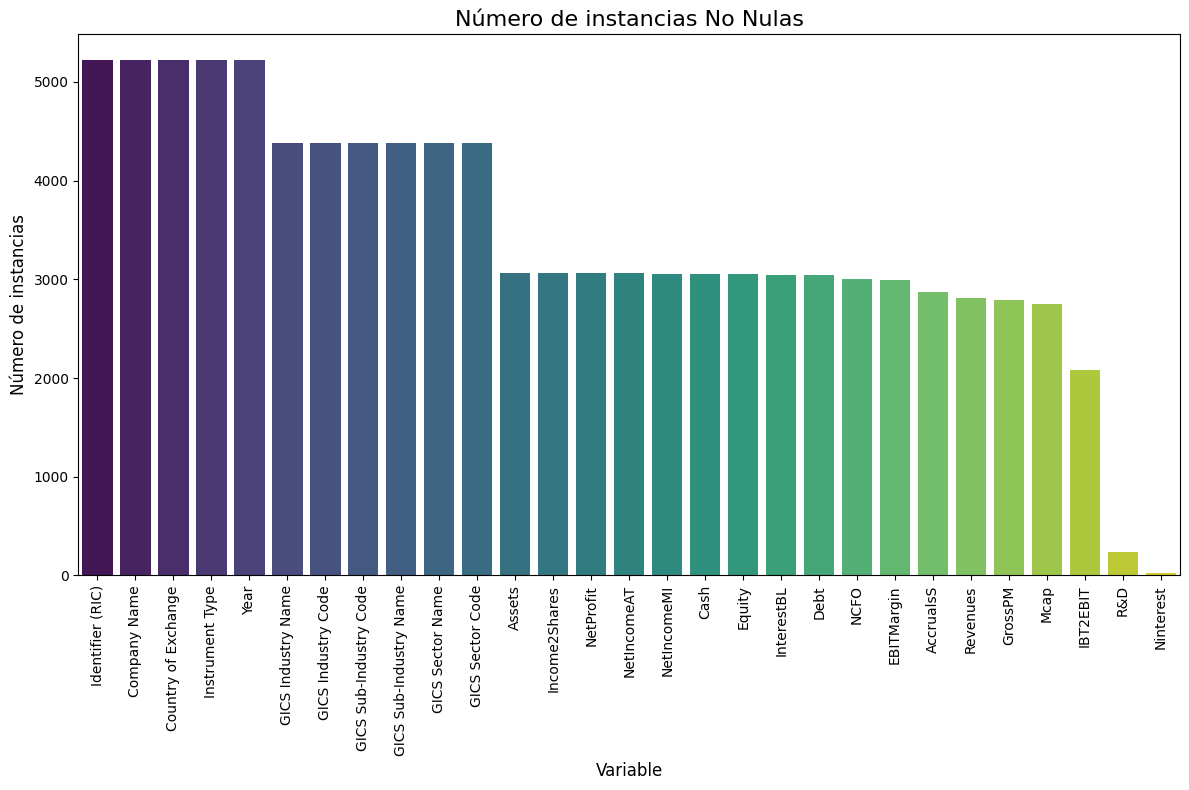

In [3]:
# GRÁFICO 1

import matplotlib.pyplot as plt
import seaborn as sns

# Calculamos los datos no nulos por variable
non_null_counts = data_long.count().sort_values(ascending=False)

# Creamos un bar plot de los no nulos
plt.figure(figsize=(12, 8))
sns.barplot(x=non_null_counts.index, y=non_null_counts.values, palette='viridis')

# Configuramos los ejes y texto
plt.xticks(rotation=90)
plt.title('Número de instancias No Nulas', fontsize=16)
plt.xlabel('Variable', fontsize=12)
plt.ylabel('Número de instancias', fontsize=12)
plt.tight_layout()
plt.show()

In [4]:
#Comprobamos el DataFrame
data_long.head()

,Identifier (RIC),Company Name,Country of Exchange,Instrument Type,GICS Industry Name,GICS Industry Code,GICS Sub-Industry Name,GICS Sub-Industry Code,GICS Sector Name,GICS Sector Code,...,NetIncomeMI,Income2Shares,NetIncomeAT,R&D,InterestBL,Ninterest,EBITMargin,NCFO,AccrualsS,GrossPM
0,IKM.MC,1nkemia IUCT Group SA,Spain,Ordinary Shares,Biotechnology,352010.0,Biotechnology,35201010.0,Health Care,35.0,...,-5.061405e+05,-5.061405e+05,-5.053429e+05,NaN,3.546286e+05,NaN,-1.880011,-1.063826e+05,-8.426981e+06,2.190259
1,ANA.MC,Acciona SA,Spain,Ordinary Shares,Electric Utilities,551010.0,Electric Utilities,55101010.0,Utilities,55.0,...,4.220000e+08,4.220000e+08,4.510000e+08,NaN,1.201000e+10,NaN,0.053101,2.239000e+09,-4.244000e+09,0.573528
2,ACX.MC,Acerinox SA,Spain,Ordinary Shares,Metals & Mining,151040.0,Steel,15104050.0,Materials,15.0,...,2.249460e+08,2.249460e+08,2.146470e+08,NaN,2.383051e+09,NaN,0.037941,2.941280e+08,9.128710e+08,0.220827
3,ACS.MC,ACS Actividades de Construccion y Servicios SA,Spain,Ordinary Shares,Construction & Engineering,201030.0,Construction & Engineering,20103010.0,Industrials,20.0,...,8.275800e+08,8.275800e+08,1.004035e+09,NaN,1.433699e+10,NaN,0.020556,2.792874e+09,-7.580090e+09,0.299857
4,ADZ.MC,Adolfo Dominguez SA,Spain,Ordinary Shares,"Textiles, Apparel & Luxury Goods",252030.0,"Apparel, Accessories & Luxury Goods",25203010.0,Consumer Discretionary,25.0,...,9.083710e+05,9.083710e+05,9.083710e+05,NaN,5.093637e+07,NaN,0.011226,1.649760e+07,-1.593629e+07,0.448998


In [5]:
import numpy as np

# Calculamos los ratios
data_long['ROE'] = data_long['NetIncomeMI'] / data_long['Equity'].where(data_long['Equity'] != 0) # Usamos NetIncomeMI
data_long['ROA'] = data_long['NetIncomeAT'] / data_long['Assets'].where(data_long['Assets'] != 0)
data_long['CFO_on_Assets'] = data_long['NCFO'] / data_long['Assets'].where(data_long['Assets'] != 0)
data_long['EBIT_Margin'] = data_long['EBITMargin'] # EBITMargin ya esta calculado pero asi mantenemos mismo formato de nombres
data_long['Gross_Margin'] = data_long['GrossPM'] # GrossPM ya esta calculado pero asi mantenemos mismo formato de nombres

# Creamos lags para las variables de crecimiento
data_long = data_long.sort_values(by=['Company Name', 'Year'], ascending=[True, False]) # Ordenamos por compañia y año

# Creamos las variables lag de Revenues y Assets
# Cambiamos el orden para que se ordenen de 0 a 19
data_long['Revenues_Lag1'] = data_long.groupby('Company Name')['Revenues'].shift(-1)
data_long['Assets_Lag1'] = data_long.groupby('Company Name')['Assets'].shift(-1)

# Calculate year-over-year growth using the lagged variables
# Growth = (Value_t - Value_t-1) / Value_t-1 = (Value_t / Value_t-1) - 1
data_long['Revenues_Growth'] = (data_long['Revenues'] / data_long['Revenues_Lag1']) - 1
data_long['Assets_Growth'] = (data_long['Assets'] / data_long['Assets_Lag1']) - 1

# Eliminamos los lags
data_long = data_long.drop(columns=['Revenues_Lag1', 'Assets_Lag1'])

data_long['Debt_to_Equity'] = data_long['InterestBL'] / data_long['Equity'].where(data_long['Equity'] != 0) # Usando InterestBL
data_long['Debt_to_Assets'] = data_long['InterestBL'] / data_long['Assets'].where(data_long['Assets'] != 0) # Usando InterestBL
data_long['Asset_Turnover'] = data_long['Revenues'] / data_long['Assets'].where(data_long['Assets'] != 0)
data_long['Log_Total_Assets'] = np.log(data_long['Assets'].where(data_long['Assets'] > 0))
data_long['Accruals'] = data_long['AccrualsS'] /data_long['Assets'].where(data_long['Assets'] != 0)

# Creamos log_m2b, log_v2a, log_v2s que serán nuestros target

data_long['m2b'] = data_long['Mcap'] / data_long['Equity'].where(data_long['Equity'] != 0)
data_long['v2a'] = (data_long['Mcap'] + data_long['Debt'] - data_long['Cash']) / data_long['Assets'].where(data_long['Assets'] != 0)
data_long['v2s'] = (data_long['Mcap'] + data_long['Debt'] - data_long['Cash']) / data_long['Revenues'].where(data_long['Revenues'] != 0)
data_long['log_m2b'] = np.log(data_long['m2b'].where(data_long['m2b'] > 0))
data_long['log_v2a'] = np.log(data_long['v2a'].where(data_long['v2a'] > 0))
data_long['log_v2s'] = np.log(data_long['v2s'].where(data_long['v2s'] > 0))

print("Info del nuevo dataframe en formato long con las variables creadas:")
data_long.info()

Info del nuevo dataframe en formato long con las variables creadas:
<class 'pandas.core.frame.DataFrame'>
Index: 5220 entries, 4959 to 69
Data columns (total 47 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Identifier (RIC)        5220 non-null   object 
 1   Company Name            5220 non-null   object 
 2   Country of Exchange     5220 non-null   object 
 3   Instrument Type         5220 non-null   object 
 4   GICS Industry Name      4380 non-null   object 
 5   GICS Industry Code      4380 non-null   float64
 6   GICS Sub-Industry Name  4380 non-null   object 
 7   GICS Sub-Industry Code  4380 non-null   float64
 8   GICS Sector Name        4380 non-null   object 
 9   GICS Sector Code        4380 non-null   float64
 10  Year                    5220 non-null   int64  
 11  Assets                  3062 non-null   float64
 12  Revenues                2809 non-null   float64
 13  Equity                  3056 

/tmp/ipython-input-3756299926.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=non_null_counts2.index, y=non_null_counts2.values, palette='viridis')


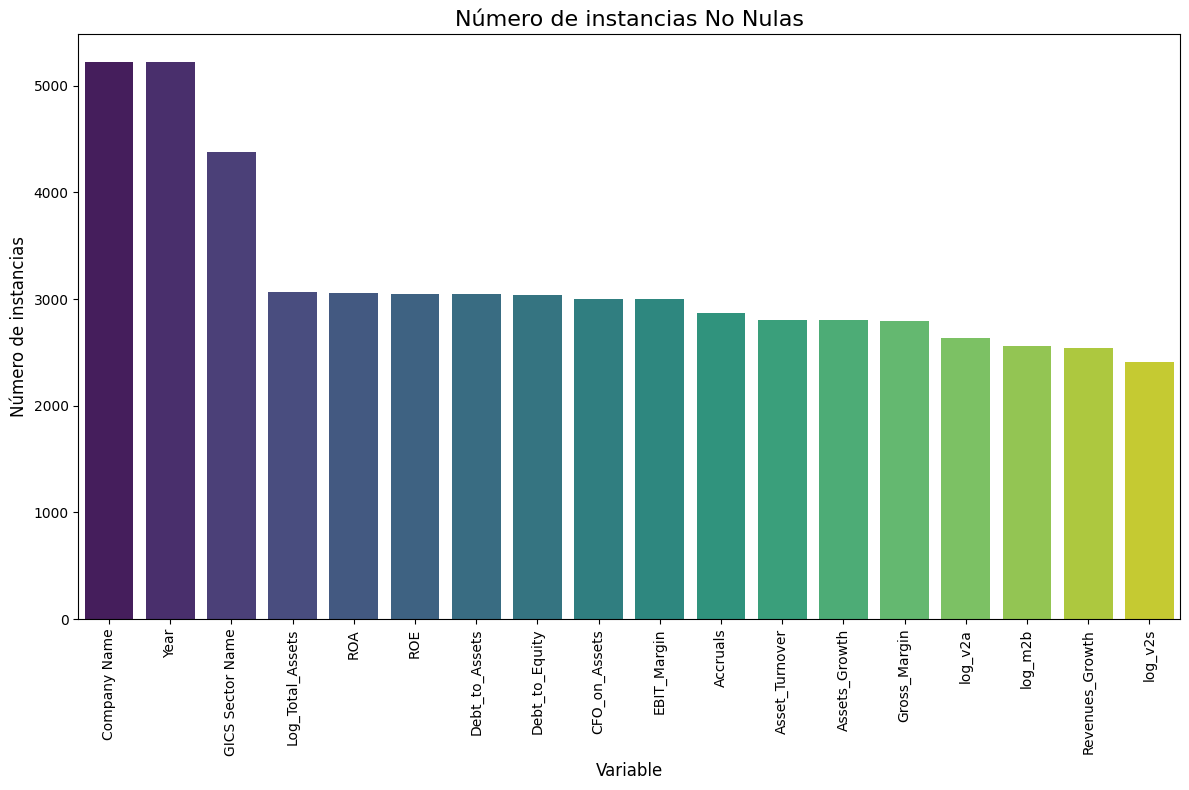

In [6]:
# Gráfico 2
# Volvemos a calcular los datos no nulos de las variables nuevas
non_null_counts2 = data_long[['Company Name', 'GICS Sector Name', 'Year', 'log_m2b', 'log_v2a', 'log_v2s',
                        'ROE', 'ROA', 'CFO_on_Assets', 'EBIT_Margin', 'Gross_Margin', 'Revenues_Growth','Assets_Growth',
                        'Debt_to_Equity', 'Debt_to_Assets','Asset_Turnover','Log_Total_Assets','Accruals']].count().sort_values(ascending=False)

# Creamos un bar plot de los no nulos
plt.figure(figsize=(12, 8))
sns.barplot(x=non_null_counts2.index, y=non_null_counts2.values, palette='viridis')

# Configuramos los ejes y texto
plt.xticks(rotation=90)
plt.title('Número de instancias No Nulas', fontsize=16)
plt.xlabel('Variable', fontsize=12)
plt.ylabel('Número de instancias', fontsize=12)
plt.tight_layout()
plt.show()

In [7]:
# Seleccionamos las columnas de nuestro nuevo dataframe
data_clean = data_long[['Company Name', 'GICS Sector Name', 'Year', 'log_m2b', 'log_v2a', 'log_v2s',
                        'ROE', 'ROA', 'CFO_on_Assets', 'EBIT_Margin', 'Gross_Margin', 'Revenues_Growth','Assets_Growth',
                        'Debt_to_Equity', 'Debt_to_Assets','Asset_Turnover','Log_Total_Assets','Accruals']].copy()

# Eliminamos las empresas Financieras
data_clean = data_clean[data_clean['GICS Sector Name']!= 'Financials'].copy()

# Eliminamos las filas con missings
data_clean.dropna(inplace=True)

print("DataFrame 'data_clean' creado y filas con nulos eliminadas.")
print("\nInformación sobre el DataFrame limpio:")
data_clean.info()

print("\nComprobación de valores nulos por variable:")
print(data_clean.isnull().sum().sort_values(ascending=False))

DataFrame 'data_clean' creado y filas con nulos eliminadas.

Información sobre el DataFrame limpio:
<class 'pandas.core.frame.DataFrame'>
Index: 1935 entries, 2871 to 330
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company Name      1935 non-null   object 
 1   GICS Sector Name  1935 non-null   object 
 2   Year              1935 non-null   int64  
 3   log_m2b           1935 non-null   float64
 4   log_v2a           1935 non-null   float64
 5   log_v2s           1935 non-null   float64
 6   ROE               1935 non-null   float64
 7   ROA               1935 non-null   float64
 8   CFO_on_Assets     1935 non-null   float64
 9   EBIT_Margin       1935 non-null   float64
 10  Gross_Margin      1935 non-null   float64
 11  Revenues_Growth   1935 non-null   float64
 12  Assets_Growth     1935 non-null   float64
 13  Debt_to_Equity    1935 non-null   float64
 14  Debt_to_Assets    1935 non-null   float

/tmp/ipython-input-1370207093.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=non_null_counts3.index, y=non_null_counts3.values, palette='viridis')


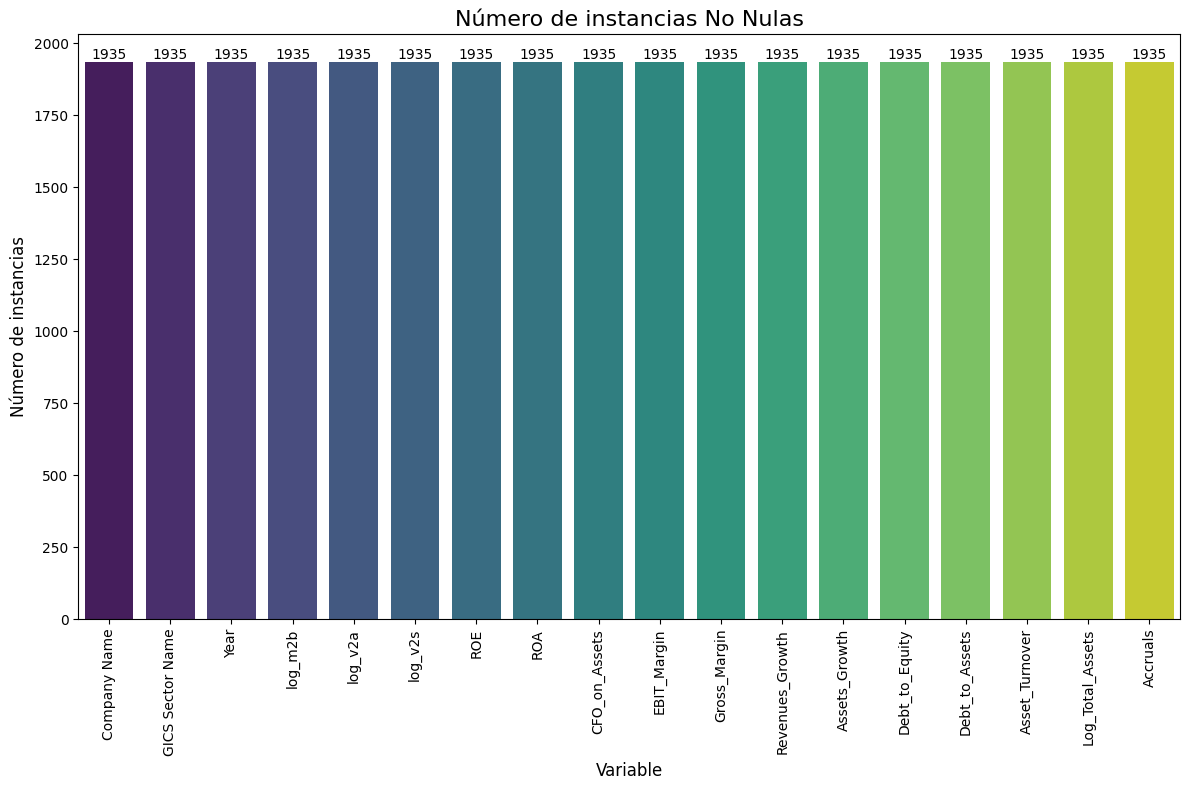

In [8]:
# Gráfico 3
# Calculamos los datos no nulos del DataFrame limpio
non_null_counts3 = data_clean.count().sort_values(ascending=False)

# Creamos un bar plot de los no nulos
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=non_null_counts3.index, y=non_null_counts3.values, palette='viridis')

# Configuramos los ejes y texto
plt.xticks(rotation=90)
plt.title('Número de instancias No Nulas', fontsize=16)
plt.xlabel('Variable', fontsize=12)
plt.ylabel('Número de instancias', fontsize=12)

# Add the count of non-null values on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

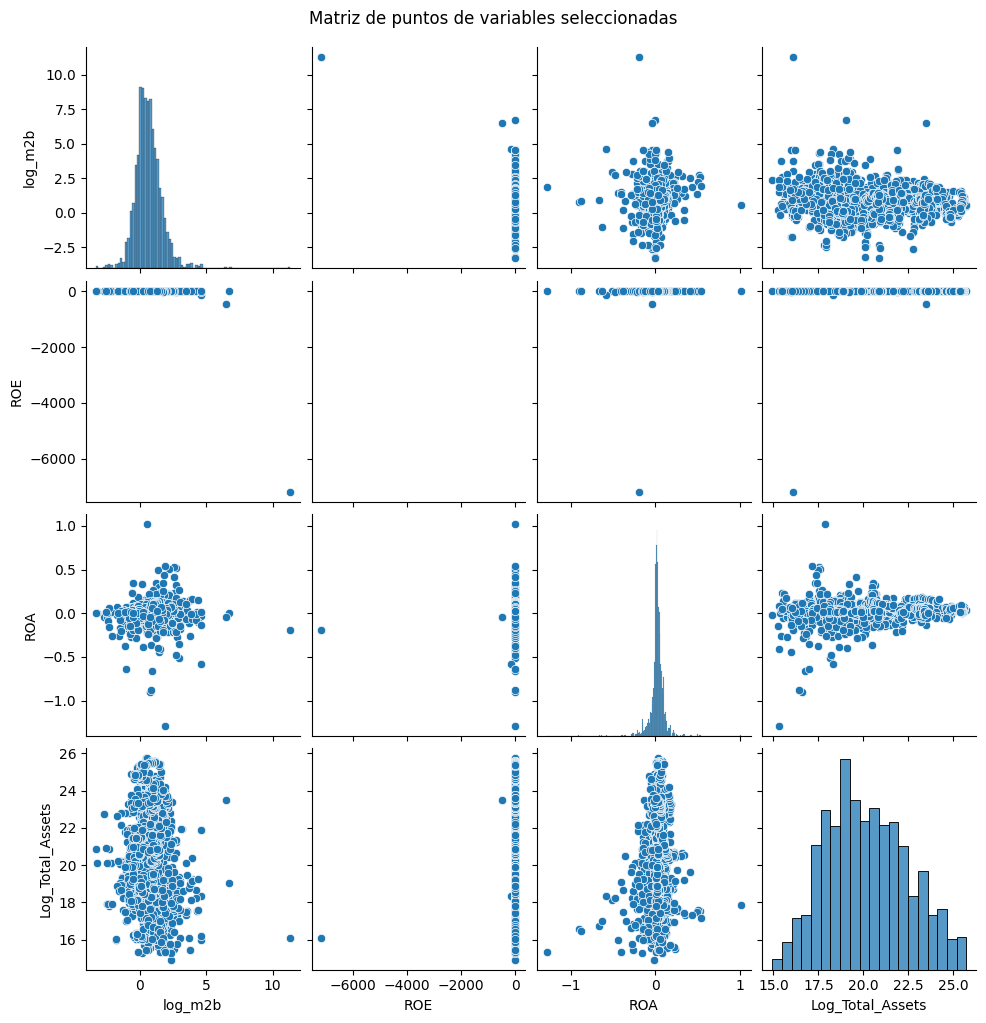

In [18]:
# Gráfico Opcional
# Seleccionamos las variables a dibujar por puntos
pairplot_vars = ['log_m2b', 'ROE', 'ROA', 'Log_Total_Assets']

# Creamos una matriz de puntos de las variables antes de windsorizar
sns.pairplot(data_clean[pairplot_vars])
plt.suptitle('Matriz de puntos de variables seleccionadas', y=1.02)
plt.show()

In [9]:
# Creamos un nuevo dataframe para windsorizar
data_clean_wind = data_clean.copy()

# Indentificamos las columnas a windsorizar
numeric_cols = data_clean_wind.select_dtypes(include=np.number).columns

# Winsorizamos el 1% superior e inferior de las variables
for col in numeric_cols:
    lower_bound = data_clean_wind[col].quantile(0.01)
    upper_bound = data_clean_wind[col].quantile(0.99)
    data_clean_wind[col] = np.clip(data_clean_wind[col], lower_bound, upper_bound)

print("DataFrame 'data_clean_wind' creado con variables windsorizadas.")

DataFrame 'data_clean_wind' creado con variables windsorizadas.


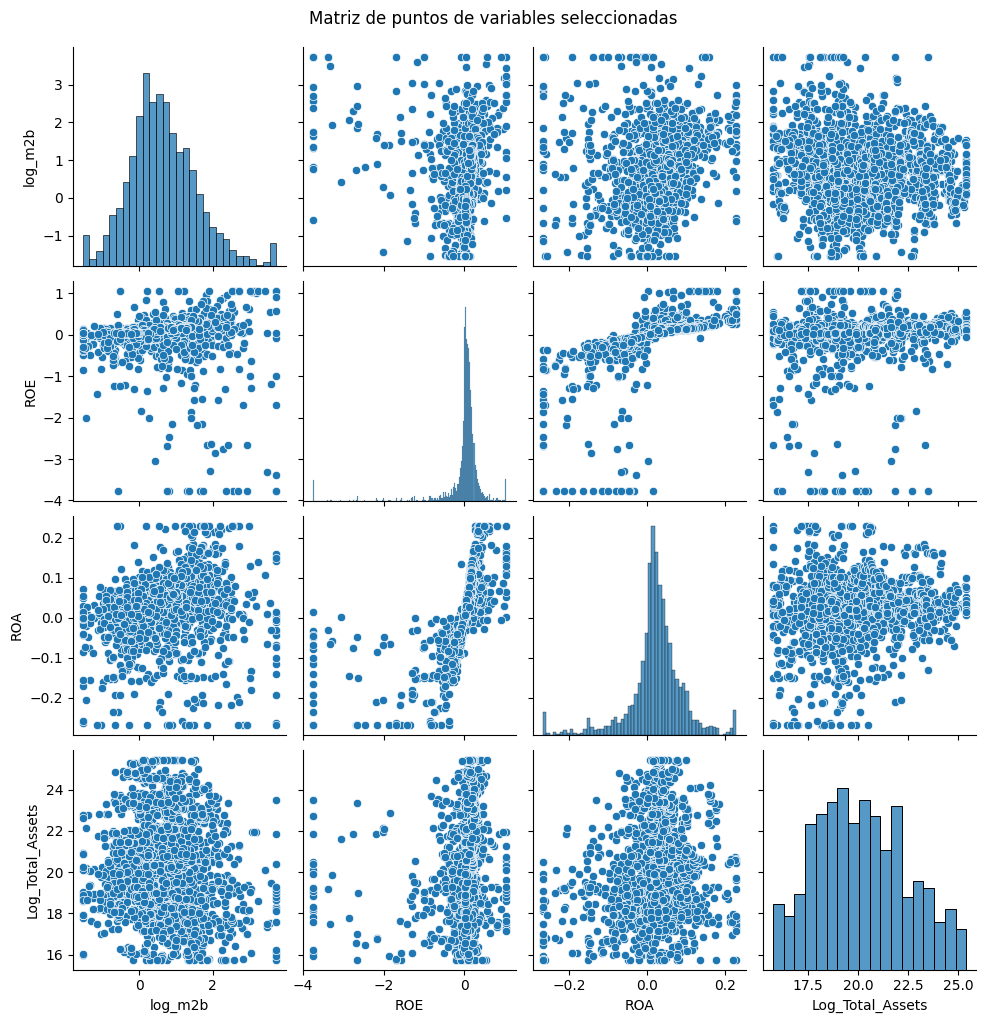

In [10]:
# Gráfico 4
# Seleccionamos las variables a dibujar por puntos
pairplot_vars = ['log_m2b', 'ROE', 'ROA', 'Log_Total_Assets']

# Creamos una matriz de puntos de las variables windsorizadas
sns.pairplot(data_clean_wind[pairplot_vars])
plt.suptitle('Matriz de puntos de variables seleccionadas', y=1.02)
plt.show()

In [11]:
# Calculamos los estadisticos descriptivos
descriptive_stats = data_clean_wind.describe().T

# Creamos una tabla para mostrarlos
descriptive_stats['count'] = descriptive_stats['count'].astype(int)
numeric_cols = descriptive_stats.select_dtypes(include=np.number).columns.tolist()
if 'count' in numeric_cols:
    numeric_cols.remove('count')
for col in numeric_cols:
    descriptive_stats[col] = descriptive_stats[col].map(lambda x: f'{x:.4f}')

print("Estadísticos descriptivos de data_clean_wind")
display(descriptive_stats)

Estadísticos descriptivos de data_clean_wind


,count,mean,std,min,25%,50%,75%,max
Year,1935,8.1871,5.4186,1.0000,3.0000,7.0000,13.0000,19.0000
log_m2b,1935,0.6464,0.9280,-1.5421,0.0557,0.5739,1.2020,3.7332
log_v2a,1935,-0.0641,0.6191,-1.6259,-0.4563,-0.1107,0.2786,1.6374
log_v2s,1935,0.9996,1.3153,-1.5569,0.0797,0.6878,1.9246,4.6340
ROE,1935,-0.0012,0.5396,-3.7607,0.0037,0.0762,0.1625,1.0433
ROA,1935,0.0219,0.0731,-0.2682,0.0006,0.0241,0.0552,0.2294
CFO_on_Assets,1935,0.0496,0.0812,-0.2292,0.0098,0.0448,0.0915,0.2956
EBIT_Margin,1935,0.0959,0.3146,-1.4821,0.0272,0.0891,0.1778,0.7971
Gross_Margin,1935,0.5221,0.2880,-0.4904,0.3313,0.4933,0.7169,1.0066
Revenues_Growth,1935,0.0028,0.4340,-0.7825,-0.1464,-0.0535,0.0501,2.8789


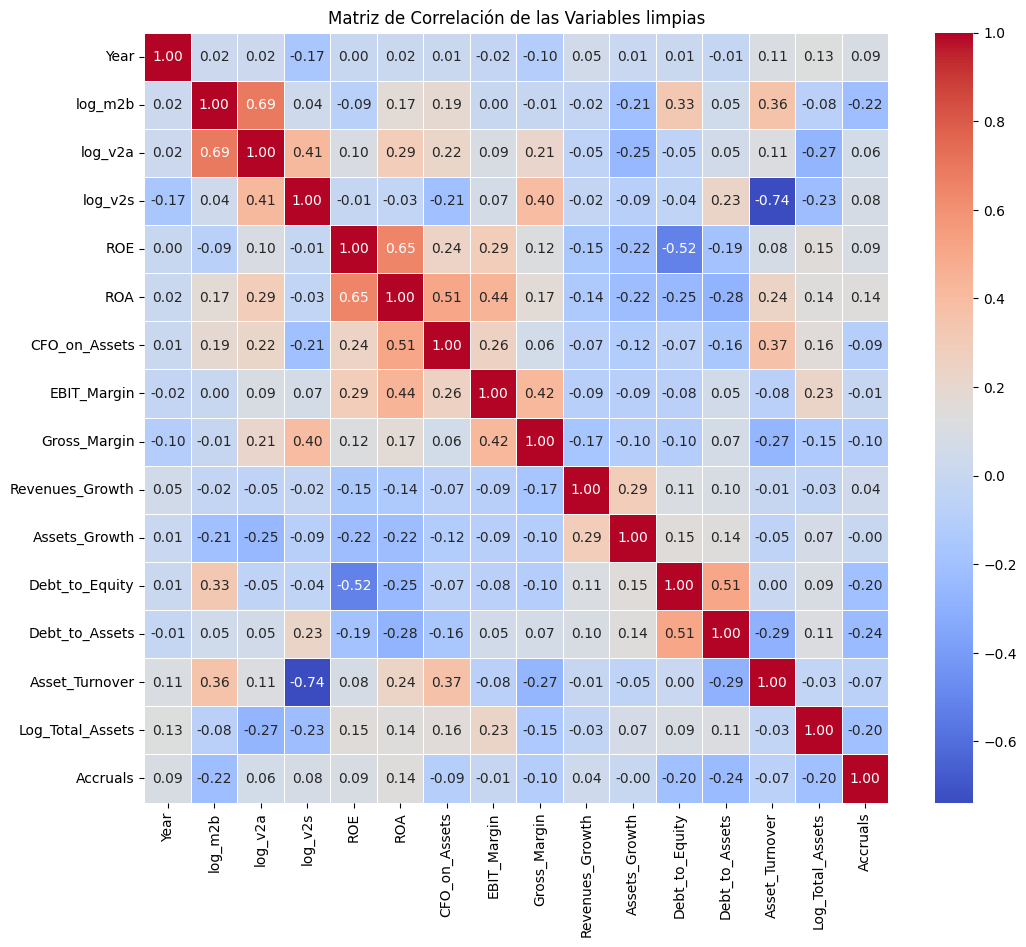

In [13]:
# Gráfico 5
# Calculamos la matriz de correlación de los datos limpios
correlation_matrix = data_clean_wind.select_dtypes(include=np.number).corr()

# Dibujamos la matriz de correlaciones
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación de las Variables limpias')
plt.show()

In [15]:
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Creamos una copia
datos = data_clean_wind.copy()

# Lista de categorías originales de la variable
categorias = datos['GICS Sector Name'].unique()

# La categoría que se elimina es la primera en orden alfabético
categoria_ref = sorted(categorias)[0]

# Transformamos 'GICS Sector Name' en dummy
datos = pd.get_dummies(datos, columns=['GICS Sector Name'], prefix='Sector',drop_first=True, dtype= int)

print(f"Categoría de referencia (eliminada con drop_first=True): {categoria_ref}")

# Definimos los años para hacer las divisiones de entrenamiento, validación y test
train_years = range(8, 20)  # Años 8 a 19 (inclusive)
val_years = range(4, 8)     # Años 4 a 7 (inclusive)
test_years = range(0, 4)    # Años 0 a 3 (inclusive)
train_val_years = range(4, 20) # Para OLS

# Dividimos los datos
train_data = datos[datos['Year'].isin(train_years)].copy()
val_data = datos[datos['Year'].isin(val_years)].copy()
train_val_data = datos[datos['Year'].isin(train_val_years)].copy()
test_data = datos[datos['Year'].isin(test_years)].copy()

print("DataFrame 'datos' creado con dummy variable para GICS Sector Name.")
print(f"\nTraining data shape: {train_data.shape}")
print(f"Validation data shape: {val_data.shape}")
print(f"Test data shape: {test_data.shape}")

print(f"\nTraining/Validation data shape: {train_val_data.shape}")

# Nuestros multiplos como variables dependientes
targets = ['log_m2b', 'log_v2a', 'log_v2s']

# Variables del Dataframe que no incluimos en los modelos
exclude_features = ['Company Name', 'Year', 'log_m2b', 'log_v2a', 'log_v2s']

# Las variables que sí incluimos
features = [col for col in train_val_data.columns if col not in exclude_features]


# Creamos un Diccionario para organizar los modelos y lista para los resultados
trained_models = {}
all_results = []

# Le damos nombre a los 9 modelos que usaremos
models_to_train = {
    'OLS': sm.OLS,
    'Random Forest (Complejo)': RandomForestRegressor,
    'Random Forest (Simple)': RandomForestRegressor, # Alternativa
    'LightGBM (Preciso)': lgb.LGBMRegressor,
    'LightGBM (Regularizado)': lgb.LGBMRegressor, # Alternativa con DART
    'SVR (Kernel RBF)': SVR,
    'SVR (Kernel Polinómico)': SVR, # Alternativa
    'MLP (Profundo)': Sequential,
    'MLP (Regularizado)': Sequential # Alternativa con Dropout
}

# Iteramos por cada modelo
for model_name, model_class in models_to_train.items():
    trained_models[model_name] = {}
    print(f"\n--- Training {model_name} Models ---")

    # Iteramos por cada variable dependiente
    for target in targets:
        print(f"\nTraining and evaluating {model_name} model for target: {target}")

        # Modelo OLS
        if model_name == 'OLS':
            X_train_model = train_val_data[features].copy()
            y_train_model = train_val_data[target]
            X_test_model = test_data[features].copy()
            y_test_model = test_data[target]

            # Constante
            X_train_model = sm.add_constant(X_train_model)
            X_test_model = sm.add_constant(X_test_model)

            # Entrenamos
            model = model_class(y_train_model, X_train_model).fit()
            print(f"{model_name} model trained successfully.")
            print(model.summary())
            if 'categoria_ref' in locals():
                print(f"Categoría de referencia: {categoria_ref}")

            # Evaluamos en el test
            y_pred_test = model.predict(X_test_model)
            rmse_test = np.sqrt(mean_squared_error(y_test_model, y_pred_test))
            mae_test = mean_absolute_error(y_test_model, y_pred_test)
            r2_test = r2_score(y_test_model, y_pred_test)

            # Evaluamos en train + val
            y_pred_train = model.predict(X_train_model)
            rmse_train = np.sqrt(mean_squared_error(y_train_model, y_pred_train))
            mae_train = mean_absolute_error(y_train_model, y_pred_train)
            r2_train = r2_score(y_train_model, y_pred_train)

            set_train_name = 'Train/Val'

        # Random Forest
        elif model_name == 'Random Forest (Complejo)':
            X_train_model = train_data[features].copy()
            y_train_model = train_data[target]
            X_test_model = test_data[features].copy()
            y_test_model = test_data[target]

            # Inicializamos modelo
            model = model_class(n_estimators=300, max_depth=10, random_state=42, n_jobs=-1)
            model.fit(X_train_model, y_train_model)
            print(f"{model_name} model trained successfully.")

            # Evaluamos en test
            y_pred_test = model.predict(X_test_model)
            rmse_test = np.sqrt(mean_squared_error(y_test_model, y_pred_test))
            mae_test = mean_absolute_error(y_test_model, y_pred_test)
            r2_test = r2_score(y_test_model, y_pred_test)

            # Evaluamos en train
            y_pred_train = model.predict(X_train_model)
            rmse_train = np.sqrt(mean_squared_error(y_train_model, y_pred_train))
            mae_train = mean_absolute_error(y_train_model, y_pred_train)
            r2_train = r2_score(y_train_model, y_pred_train)

            set_train_name = 'Train'

        elif model_name == 'Random Forest (Simple)':
            X_train_model = train_data[features].copy()
            y_train_model = train_data[target]
            X_test_model = test_data[features].copy()
            y_test_model = test_data[target]

            # Alternativa: más árboles pero mucho más simples (menos profundos)
            # para mejorar la generalización y reducir el sobreajuste.
            # `max_features='sqrt'` es una heurística estándar para de-correlacionar los árboles.
            model = RandomForestRegressor(n_estimators=1000, max_depth=5, max_features='sqrt', random_state=42, n_jobs=-1)
            model.fit(X_train_model, y_train_model)
            print(f"{model_name} model trained successfully.")

            y_pred_test = model.predict(X_test_model)
            rmse_test = np.sqrt(mean_squared_error(y_test_model, y_pred_test))
            mae_test = mean_absolute_error(y_test_model, y_pred_test)
            r2_test = r2_score(y_test_model, y_pred_test)

            y_pred_train = model.predict(X_train_model)
            rmse_train = np.sqrt(mean_squared_error(y_train_model, y_pred_train))
            mae_train = mean_absolute_error(y_train_model, y_pred_train)
            r2_train = r2_score(y_train_model, y_pred_train)

            set_train_name = 'Train'

        # LightGBM
        elif model_name == 'LightGBM (Preciso)':
            X_train_model = train_data[features].copy()
            y_train_model = train_data[target]
            X_val_model = val_data[features].copy()
            y_val_model = val_data[target]
            X_test_model = test_data[features].copy()
            y_test_model = test_data[target]

            # Inicializamos y entrenamos Light GBM
            model = model_class(objective='regression_l1', # MAE objective
                                metric='mae',
                                n_estimators=3000,
                                learning_rate=0.01,
                                feature_fraction=0.8,
                                bagging_fraction=0.8,
                                bagging_freq=1,
                                lambda_l1=0.1,
                                lambda_l2=0.1,
                                num_leaves=31,
                                n_jobs=-1,
                                seed=42)

            # Entrenamos con early stop
            model.fit(X_train_model, y_train_model,
                      eval_set=[(X_val_model, y_val_model)],
                      callbacks=[lgb.early_stopping(stopping_rounds=50, verbose=False)])

            print(f"{model_name} model trained successfully.")


            # Evaluamos en test
            y_pred_test = model.predict(X_test_model)
            rmse_test = np.sqrt(mean_squared_error(y_test_model, y_pred_test))
            mae_test = mean_absolute_error(y_test_model, y_pred_test)
            r2_test = r2_score(y_test_model, y_pred_test)

            # Evaluamos en train
            y_pred_train = model.predict(X_train_model)
            rmse_train = np.sqrt(mean_squared_error(y_train_model, y_pred_train))
            mae_train = mean_absolute_error(y_train_model, y_pred_train)
            r2_train = r2_score(y_train_model, y_pred_train)

            set_train_name = 'Train'

        elif model_name == 'LightGBM (Regularizado)':
            X_train_model = train_data[features].copy()
            y_train_model = train_data[target]
            X_val_model = val_data[features].copy()
            y_val_model = val_data[target]
            X_test_model = test_data[features].copy()
            y_test_model = test_data[target]

            # Alternativa: Se usa el `boosting_type='dart'`, que aplica una forma de Dropout a los árboles
            # para combatir el sobreajuste, una técnica investigada por Rashmi & Gilad-Bachrach (2015).
            model = lgb.LGBMRegressor(objective='regression_l1',
                                      boosting_type='dart',
                                      n_estimators=500,            # suficiente, sin early stopping en dart
                                      learning_rate=0.05,          # lento y estable
                                      num_leaves=15,               # pocas hojas para evitar sobreajuste (default 31)
                                      max_depth=4,                 # árboles poco profundos, evita ruido
                                      min_data_in_leaf=20,         # cada hoja debe tener al menos 20 obs
                                      feature_fraction=0.8,        # usa solo 80% de variables por split
                                      bagging_fraction=0.8,        # bootstrap del 80% de los datos
                                      bagging_freq=5,              # re-muestreo cada 5 iteraciones
                                      drop_rate=0.1,               # probabilidad de dropout en cada iteración
                                      lambda_l1=0.1,               # regularización L1
                                      lambda_l2=0.1,               # regularización L2
                                      seed=42,
                                      n_jobs=-1,
                                      )

            model.fit(X_train_model, y_train_model,
                      eval_set=[(X_val_model, y_val_model)],
                      )
            print(f"{model_name} model trained successfully.")

            # Evaluamos en test
            y_pred_test = model.predict(X_test_model)
            rmse_test = np.sqrt(mean_squared_error(y_test_model, y_pred_test))
            mae_test = mean_absolute_error(y_test_model, y_pred_test)
            r2_test = r2_score(y_test_model, y_pred_test)

            # Evaluamos en train
            y_pred_train = model.predict(X_train_model)
            rmse_train = np.sqrt(mean_squared_error(y_train_model, y_pred_train))
            mae_train = mean_absolute_error(y_train_model, y_pred_train)
            r2_train = r2_score(y_train_model, y_pred_train)

            set_train_name = 'Train'

        #SVR
        elif 'SVR' in model_name:
            X_train_model = train_data[features].copy()
            y_train_model = train_data[target]
            X_test_model = test_data[features].copy()
            y_test_model = test_data[target]

            # Escalamos para que no afecten
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train_model)
            X_test_scaled = scaler.transform(X_test_model)

            # Inicializamos el modelo SVR
            if model_name == 'SVR (Kernel RBF)':
                # El kernel RBF es el estándar para capturar no linealidades complejas.
                model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

            elif model_name == 'SVR (Kernel Polinómico)':
                # Alternativa: El kernel polinómico (grado 2) es menos flexible que RBF
                # pero puede ser efectivo si la relación subyacente es cuadrática.
                # Es una elección clásica en el trade-off sesgo-varianza.
                model = SVR(kernel='poly', degree=2, C=1.0, epsilon=0.1)

            model.fit(X_train_scaled, y_train_model)
            print(f"{model_name} model trained successfully.")

            # Evaluamos en test
            y_pred_test = model.predict(X_test_scaled)
            rmse_test = np.sqrt(mean_squared_error(y_test_model, y_pred_test))
            mae_test = mean_absolute_error(y_test_model, y_pred_test)
            r2_test = r2_score(y_test_model, y_pred_test)

            # Evaluamos en train
            y_pred_train = model.predict(X_train_scaled)
            rmse_train = np.sqrt(mean_squared_error(y_train_model, y_pred_train))
            mae_train = mean_absolute_error(y_train_model, y_pred_train)
            r2_train = r2_score(y_train_model, y_pred_train)

            set_train_name = 'Train'
        # Redes Neuronales
        elif 'MLP' in model_name:
            X_train_model = train_data[features].copy()
            y_train_model = train_data[target]
            X_val_model = val_data[features].copy()
            y_val_model = val_data[target]
            X_test_model = test_data[features].copy()
            y_test_model = test_data[target]

            # Escalamos variables
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train_model)
            X_val_scaled = scaler.transform(X_val_model)
            X_test_scaled = scaler.transform(X_test_model)

            if model_name == 'MLP (Profundo)':
                # Modelo más grande y profundo, con más capacidad de aprendizaje.
                model = Sequential([
                    Dense(128, activation='relu'),
                    Dense(64, activation='relu'),
                    Dense(32, activation='relu'),
                    Dense(1)
                ])

            elif model_name == 'MLP (Regularizado)':
                # Modelo más pequeño con Dropout, una técnica de regularización
                # fundamental para prevenir el sobreajuste en redes neuronales (Srivastava et al., 2014).
                model = Sequential([
                    Dense(32, activation='relu'),
                    Dropout(0.2),
                    Dense(16, activation='relu'),
                    Dropout(0.2),
                    Dense(1)
                ])

            # Compilamos el modelo
            model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse', 'RootMeanSquaredError'])

            # Entrenamos con validación y early stop
            early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

            history = model.fit(X_train_scaled, y_train_model,
                                validation_data=(X_val_scaled, y_val_model),
                                epochs=1000, # Sufficiente número de epochs
                                callbacks=[early_stopping],
                                verbose=0) # No mostramos entrenamiento en pantalla

            print(f"{model_name} model trained successfully.")

            # Evaluamos en test
            _, mae_test, _, rmse_test = model.evaluate(X_test_scaled, y_test_model, verbose=0)
            r2_test = r2_score(y_test_model, model.predict(X_test_scaled, verbose=0))


            # Evaluamos en train
            _, mae_train, _, rmse_train = model.evaluate(X_train_scaled, y_train_model, verbose=0)
            r2_train = r2_score(y_train_model, model.predict(X_train_scaled, verbose=0))

            set_train_name = 'Train'


        # Guardamos el modelo entrenado
        trained_models[model_name][target] = model

        # Guardamos los resultados para train y test
        all_results.append({
            'Target': target,
            'Model': model_name,
            'Set': 'Test',
            'RMSE': rmse_test,
            'MAE': mae_test,
            'R2 Score': r2_test
        })
        all_results.append({
            'Target': target,
            'Model': model_name,
            'Set': set_train_name,
            'RMSE': rmse_train,
            'MAE': mae_train,
            'R2 Score': r2_train
        })

# Mostramos resultados
all_results_df = pd.DataFrame(all_results)

# Resultados separados para train y test
train_results = all_results_df[all_results_df['Set'].str.contains('Train')].copy()
test_results = all_results_df[all_results_df['Set'] == 'Test'].copy()

# Para poner en verde la mejor puntuación en cada métrica
def highlight_best(s):
    if s.name in ['RMSE', 'MAE']:
        is_best = s == s.min()
        return ['background-color: green' if v else '' for v in is_best]
    elif s.name == 'R2 Score':
        is_best = s == s.max()
        return ['background-color: green' if v else '' for v in is_best]
    else:
        return ['' for _ in s]


# Mostramos la tabla de Traini
print("\nComparison of Model Performance on Training Data:")
for target in train_results['Target'].unique():
    print(f"\n--- Training Results for {target} ---")
    target_train_results = train_results[train_results['Target'] == target].drop(columns='Target')
    display(target_train_results.style.apply(highlight_best, axis=0)) # Highlight column-wise


# Mostramos la tabla de Test
print("\nComparison of Model Performance on Test Data:")
for target in test_results['Target'].unique():
    print(f"\n--- Test Results for {target} ---")
    target_test_results = test_results[test_results['Target'] == target].drop(columns='Target')
    display(target_test_results.style.apply(highlight_best, axis=0)) # Highlight column-wise

Se han truncado las últimas 5000 líneas del flujo de salida.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

,Model,Set,RMSE,MAE,R2 Score
1,OLS,Train/Val,0.705635,0.534026,0.404979
7,Random Forest (Complejo),Train,0.321936,0.249248,0.874806
13,Random Forest (Simple),Train,0.594062,0.453605,0.573705
19,LightGBM (Preciso),Train,0.350751,0.182804,0.851391
25,LightGBM (Regularizado),Train,0.548065,0.362765,0.637164
31,SVR (Kernel RBF),Train,0.439674,0.309241,0.766489
37,SVR (Kernel Polinómico),Train,0.606027,0.436290,0.556360
43,MLP (Profundo),Train,0.358143,0.272152,0.845061
49,MLP (Regularizado),Train,0.473630,0.368107,0.729028



--- Training Results for log_v2a ---


,Model,Set,RMSE,MAE,R2 Score
3,OLS,Train/Val,0.475320,0.355993,0.391443
9,Random Forest (Complejo),Train,0.193513,0.149560,0.893627
15,Random Forest (Simple),Train,0.366288,0.284570,0.618885
21,LightGBM (Preciso),Train,0.238290,0.126555,0.838705
27,LightGBM (Regularizado),Train,0.337699,0.226571,0.676055
33,SVR (Kernel RBF),Train,0.278030,0.194707,0.780419
39,SVR (Kernel Polinómico),Train,0.400690,0.290416,0.543933
45,MLP (Profundo),Train,0.265016,0.202482,0.800494
51,MLP (Regularizado),Train,0.284815,0.220224,0.769570



--- Training Results for log_v2s ---


,Model,Set,RMSE,MAE,R2 Score
5,OLS,Train/Val,0.625919,0.466796,0.753125
11,Random Forest (Complejo),Train,0.174800,0.131940,0.975103
17,Random Forest (Simple),Train,0.468893,0.353308,0.820852
23,LightGBM (Preciso),Train,0.247926,0.126681,0.949915
29,LightGBM (Regularizado),Train,0.392662,0.248593,0.874367
35,SVR (Kernel RBF),Train,0.349166,0.233177,0.900659
41,SVR (Kernel Polinómico),Train,0.513460,0.354930,0.785178
47,MLP (Profundo),Train,0.237834,0.181704,0.953909
53,MLP (Regularizado),Train,0.325072,0.245198,0.913896



Comparison of Model Performance on Test Data:

--- Test Results for log_m2b ---


,Model,Set,RMSE,MAE,R2 Score
0,OLS,Test,0.740590,0.553540,0.411367
6,Random Forest (Complejo),Test,0.732723,0.543898,0.423806
12,Random Forest (Simple),Test,0.759689,0.562956,0.380614
18,LightGBM (Preciso),Test,0.700199,0.519842,0.473822
24,LightGBM (Regularizado),Test,0.736632,0.540740,0.417641
30,SVR (Kernel RBF),Test,0.724661,0.549746,0.436415
36,SVR (Kernel Polinómico),Test,0.784484,0.598142,0.339523
42,MLP (Profundo),Test,0.701447,0.524937,0.471945
48,MLP (Regularizado),Test,0.690938,0.528884,0.487649



--- Test Results for log_v2a ---


,Model,Set,RMSE,MAE,R2 Score
2,OLS,Test,0.545490,0.404697,0.287745
8,Random Forest (Complejo),Test,0.502175,0.370267,0.396367
14,Random Forest (Simple),Test,0.521396,0.385094,0.349276
20,LightGBM (Preciso),Test,0.491486,0.361645,0.421792
26,LightGBM (Regularizado),Test,0.499391,0.365794,0.403042
32,SVR (Kernel RBF),Test,0.496457,0.377340,0.410037
38,SVR (Kernel Polinómico),Test,0.605443,0.438518,0.122577
44,MLP (Profundo),Test,0.515579,0.379037,0.363713
50,MLP (Regularizado),Test,0.486630,0.364852,0.433161



--- Test Results for log_v2s ---


,Model,Set,RMSE,MAE,R2 Score
4,OLS,Test,0.713464,0.525980,0.758225
10,Random Forest (Complejo),Test,0.524126,0.392138,0.869522
16,Random Forest (Simple),Test,0.699490,0.544572,0.767603
22,LightGBM (Preciso),Test,0.524067,0.389224,0.869551
28,LightGBM (Regularizado),Test,0.567539,0.429949,0.847012
34,SVR (Kernel RBF),Test,0.663526,0.478550,0.790886
40,SVR (Kernel Polinómico),Test,0.924069,0.635964,0.594421
46,MLP (Profundo),Test,0.619789,0.447553,0.817545
52,MLP (Regularizado),Test,0.596343,0.443581,0.831088


/tmp/ipython-input-510172789.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=importance_df, palette='viridis')


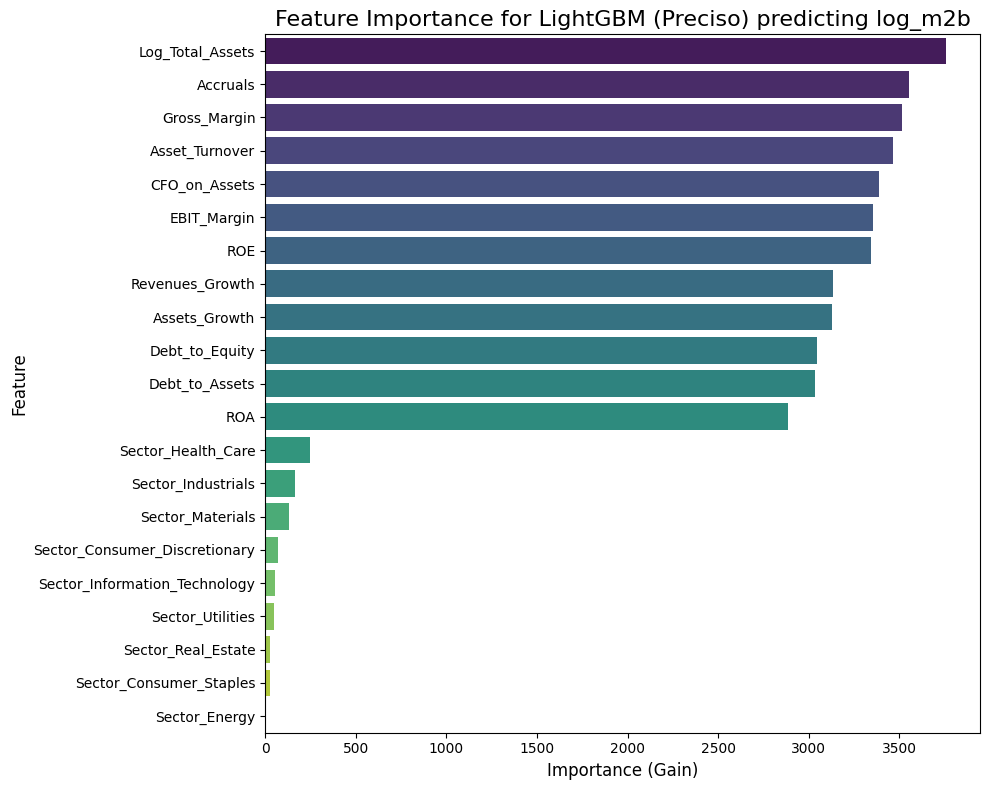

/tmp/ipython-input-510172789.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=importance_df, palette='viridis')


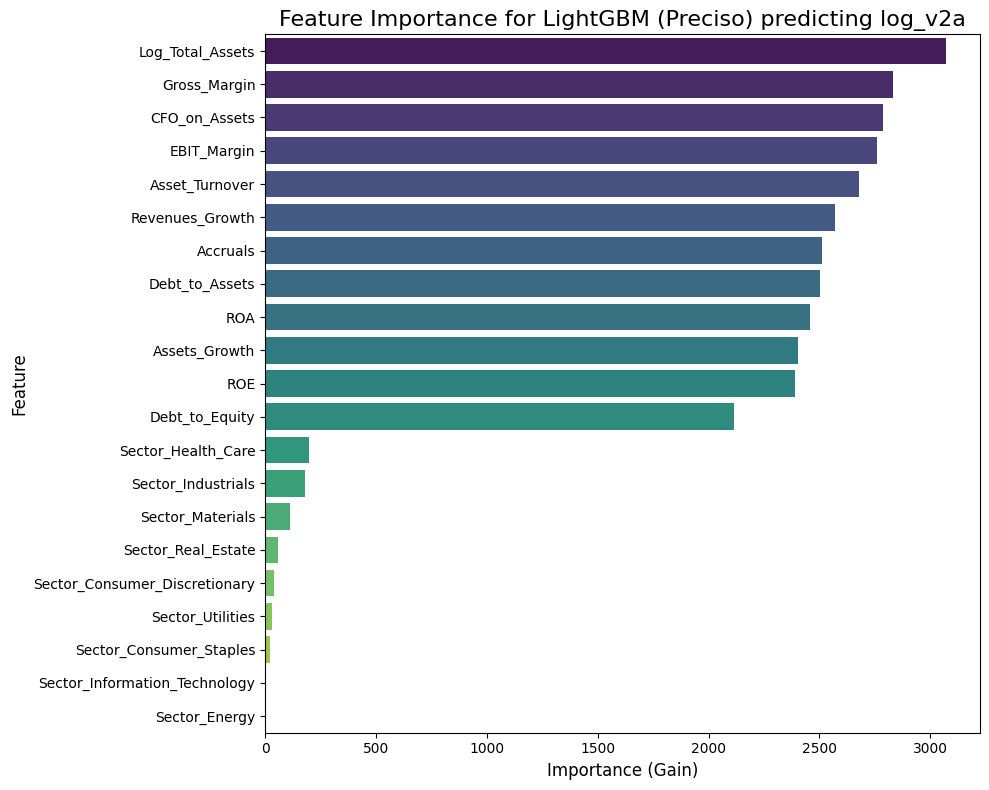

/tmp/ipython-input-510172789.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=importance_df, palette='viridis')


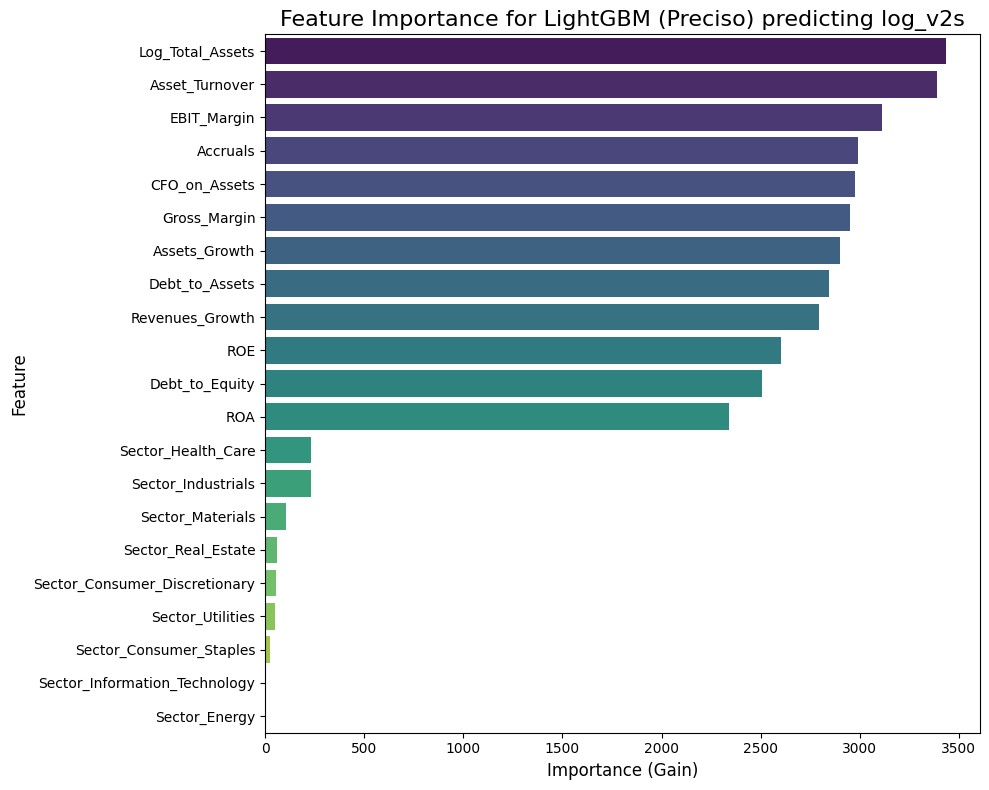

In [20]:
# Feature importance no mostrar en TFM --> Mejor hacer SHAP
model_name = 'LightGBM (Preciso)'
target_variables = ['log_m2b', 'log_v2a', 'log_v2s']

if 'trained_models' not in locals() or model_name not in trained_models:
    print("Entrena el modelo primero")
else:
    for target in target_variables:
        if target in trained_models[model_name]:
            model = trained_models[model_name][target]

            # Feature importance
            if hasattr(model, 'feature_importances_'):
                importance = model.feature_importances_

                # nombre de los atributos
                if hasattr(model, 'feature_name_'):
                    feature_names = model.feature_name_
                elif hasattr(model, 'feature_names_in_'):
                     feature_names = model.feature_names_in_
                else:
                    # Lista genérica si no están las features
                    feature_names = [f'Feature {i}' for i in range(len(importance))]

                # Importamos como Serie
                importance_series = pd.Series(importance, index=feature_names)
                importance_df = importance_series.reset_index()
                importance_df.columns = ['feature', 'importance']

                # Ordenamos de mayor a menor
                importance_df = importance_df.sort_values('importance', ascending=False)

                # Creamos el bar plot horizontal
                plt.figure(figsize=(10, 8))
                sns.barplot(x='importance', y='feature', data=importance_df, palette='viridis')
                plt.title(f'Feature Importance for {model_name} predicting {target}', fontsize=16)
                plt.xlabel('Importance (Gain)', fontsize=12)
                plt.ylabel('Feature', fontsize=12)
                plt.tight_layout()
                plt.show()

            else:
                 print(f"Warning: Model {model_name} for target {target} does not have a 'feature_importances_' attribute.")

        else:
            print(f"Warning: Model {model_name} for target '{target}' not found in trained_models.")

In [21]:
# Instalamos SHAP
!pip install shap


Generating SHAP summary plot for target: log_m2b (Model: LightGBM (Preciso))


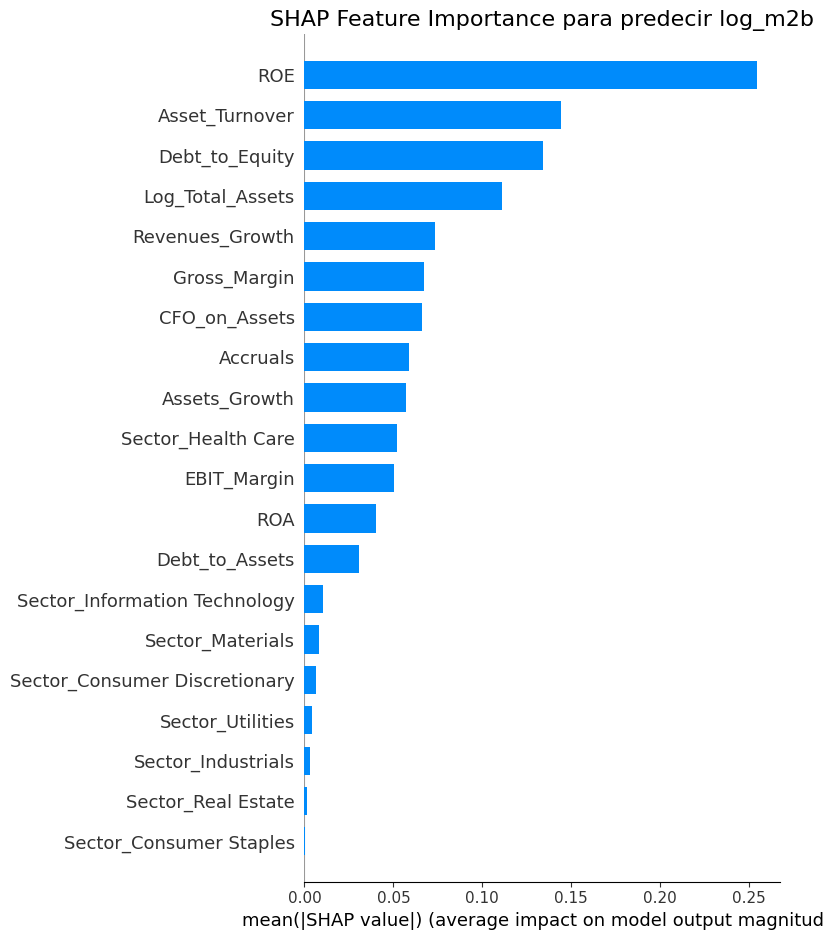


Generating SHAP summary plot for target: log_v2a (Model: LightGBM (Preciso))


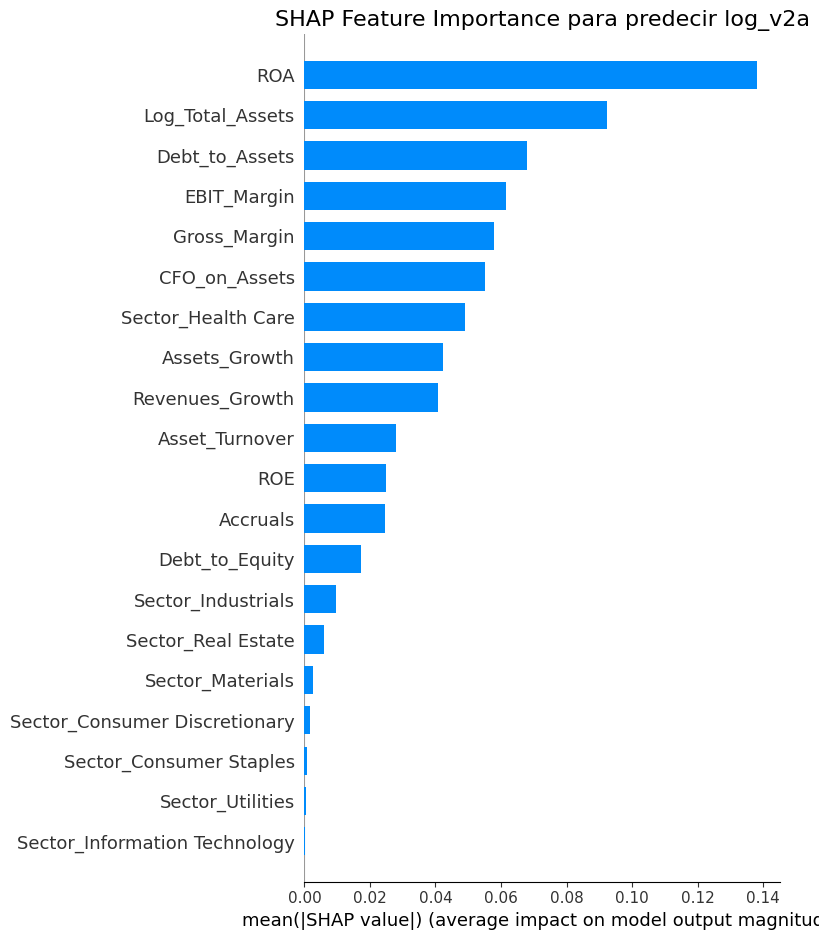


Generating SHAP summary plot for target: log_v2s (Model: LightGBM (Preciso))


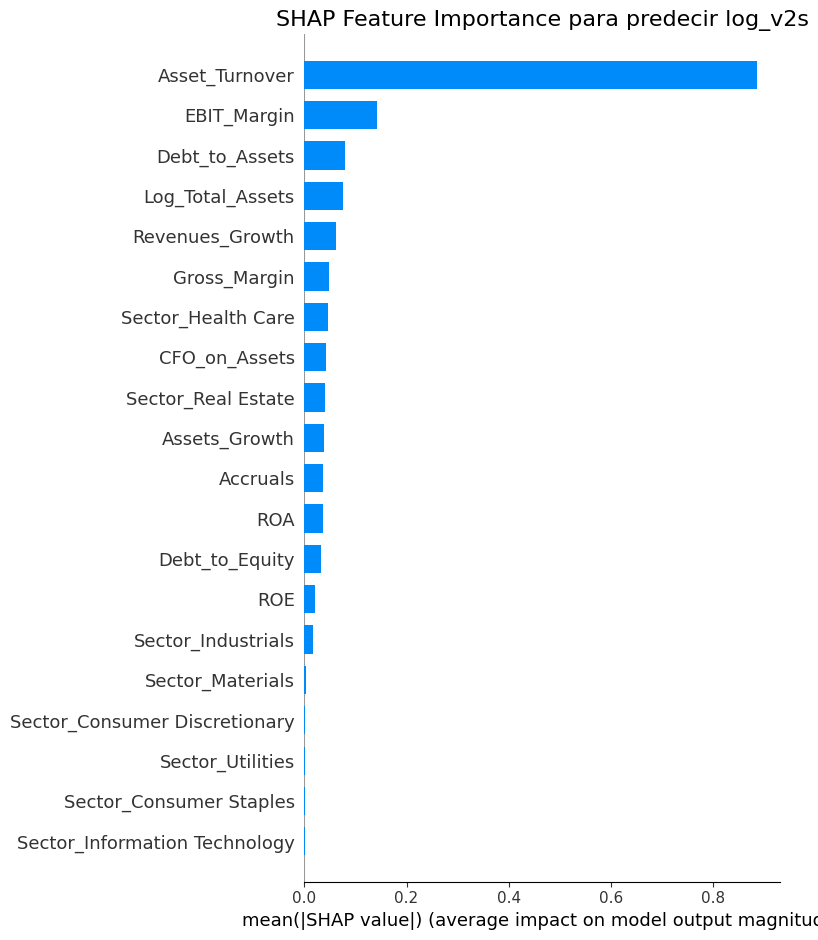

In [22]:
import shap

# Creamos la visualización de los SHAP de Light GBM (Preciso)
if 'data_clean_wind' not in locals():
    print("Error: data_clean_wind DataFrame not found.")
    print("Please ensure the data cleaning and winsorization steps have been run.")
else:
    # Creamos la misma separación de datos de antes para los modelos para el SHAP
    datos = data_clean_wind.copy()

    datos = pd.get_dummies(datos, columns=['GICS Sector Name'], prefix='Sector', drop_first=True, dtype=int)
    train_years = range(8, 20)
    val_years = range(4, 8)
    test_years = range(0, 4)
    exclude_features = ['Company Name', 'Year', 'log_m2b', 'log_v2a', 'log_v2s']
    all_possible_features = [col for col in datos.columns if col not in exclude_features]
    original_features = [col for col in data_clean_wind.columns if col not in exclude_features + ['GICS Sector Name']]
    dummy_features = [col for col in datos.columns if 'Sector_' in col]
    features_encoded = original_features + dummy_features

    # Solo necesitamos X_test para SHAP
    X_test = datos[datos['Year'].isin(test_years)][features_encoded].copy()

    # Transformamos bool a int para evitar problemas
    for col in X_test.select_dtypes(include='bool').columns:
        X_test[col] = X_test[col].astype(int)
    # --- Fin de la replicación de la preparación de datos ---


    # Buscamos el modelo
    model_name = 'LightGBM (Preciso)'
    target_variables = ['log_m2b', 'log_v2a', 'log_v2s']

    if 'trained_models' not in locals() or model_name not in trained_models:
        print(f"Error: Trained models or model type '{model_name}' not found in trained_models.")
        print("Please ensure the comprehensive training cell has been run.")
    else:
        # X_test_shap debe contener las mismas columnas en el mismo orden
        X_test_shap = X_test[features_encoded].copy()

        for target in target_variables:
            if target in trained_models[model_name]:
                model = trained_models[model_name][target]

                print(f"\nGenerating SHAP summary plot for target: {target} (Model: {model_name})")

                # Creamos SHAP explainer
                explainer = shap.TreeExplainer(model)

                # Calculamos los valores SHAP
                shap_values = explainer.shap_values(X_test_shap)

                # Generamos el bar plot de los SHAP values
                shap.summary_plot(shap_values, X_test_shap, plot_type="bar", show=False)
                plt.title(f'SHAP Feature Importance para predecir {target}', fontsize=16)
                plt.tight_layout()
                plt.show()

            else:
                print(f"Warning: Model {model_name} for target '{target}' not found in trained_models. Skipping SHAP plot.")

# Añadido
## Modelos entrenados sin Assets_turnover como *predictor*

In [23]:
# Creamos una copia
datos = data_clean_wind.copy()

# Lista de categorías originales de la variable
categorias = datos['GICS Sector Name'].unique()

# La categoría que se elimina es la primera en orden alfabético
categoria_ref = sorted(categorias)[0]

# Transformamos 'GICS Sector Name' en dummy
datos = pd.get_dummies(datos, columns=['GICS Sector Name'], prefix='Sector',drop_first=True, dtype= int)

print(f"Categoría de referencia (eliminada con drop_first=True): {categoria_ref}")

# Definimos los años para hacer las divisiones de entrenamiento, validación y test
train_years = range(8, 20)  # Años 8 a 19 (inclusive)
val_years = range(4, 8)     # Años 4 a 7 (inclusive)
test_years = range(0, 4)    # Años 0 a 3 (inclusive)
train_val_years = range(4, 20) # Para OLS

# Dividimos los datos
train_data = datos[datos['Year'].isin(train_years)].copy()
val_data = datos[datos['Year'].isin(val_years)].copy()
train_val_data = datos[datos['Year'].isin(train_val_years)].copy()
test_data = datos[datos['Year'].isin(test_years)].copy()

print("DataFrame 'datos' creado con dummy variable para GICS Sector Name.")
print(f"\nTraining data shape: {train_data.shape}")
print(f"Validation data shape: {val_data.shape}")
print(f"Test data shape: {test_data.shape}")

print(f"\nTraining/Validation data shape: {train_val_data.shape}")

# Nuestros multiplos como variables dependientes
targets = ['log_m2b', 'log_v2a', 'log_v2s']

# Variables del Dataframe que no incluimos en los modelos
exclude_features = ['Company Name', 'Year', 'log_m2b', 'log_v2a', 'log_v2s', 'Asset_Turnover']

# Las variables que sí incluimos
features = [col for col in train_val_data.columns if col not in exclude_features]


# Creamos un Diccionario para organizar los modelos y lista para los resultados
trained_models2 = {}
all_results2 = []

# Le damos nombre a los 9 modelos que usaremos
models_to_train = {
    'OLS': sm.OLS,
    'Random Forest (Complejo)': RandomForestRegressor,
    'Random Forest (Simple)': RandomForestRegressor, # Alternativa
    'LightGBM (Preciso)': lgb.LGBMRegressor,
    'LightGBM (Regularizado)': lgb.LGBMRegressor, # Alternativa con DART
    'SVR (Kernel RBF)': SVR,
    'SVR (Kernel Polinómico)': SVR, # Alternativa
    'MLP (Profundo)': Sequential,
    'MLP (Regularizado)': Sequential # Alternativa con Dropout
}

# Iteramos por cada modelo
for model_name, model_class in models_to_train.items():
    trained_models[model_name] = {}
    print(f"\n--- Training {model_name} Models ---")

    # Iteramos por cada variable dependiente
    for target in targets:
        print(f"\nTraining and evaluating {model_name} model for target: {target}")

        # Modelo OLS
        if model_name == 'OLS':
            X_train_model = train_val_data[features].copy()
            y_train_model = train_val_data[target]
            X_test_model = test_data[features].copy()
            y_test_model = test_data[target]

            # Constante
            X_train_model = sm.add_constant(X_train_model)
            X_test_model = sm.add_constant(X_test_model)

            # Entrenamos
            model = model_class(y_train_model, X_train_model).fit()
            print(f"{model_name} model trained successfully.")
            print(model.summary())
            if 'categoria_ref' in locals():
                print(f"Categoría de referencia: {categoria_ref}")

            # Evaluamos en el test
            y_pred_test = model.predict(X_test_model)
            rmse_test = np.sqrt(mean_squared_error(y_test_model, y_pred_test))
            mae_test = mean_absolute_error(y_test_model, y_pred_test)
            r2_test = r2_score(y_test_model, y_pred_test)

            # Evaluamos en train + val
            y_pred_train = model.predict(X_train_model)
            rmse_train = np.sqrt(mean_squared_error(y_train_model, y_pred_train))
            mae_train = mean_absolute_error(y_train_model, y_pred_train)
            r2_train = r2_score(y_train_model, y_pred_train)

            set_train_name = 'Train/Val'

        # Random Forest
        elif model_name == 'Random Forest (Complejo)':
            X_train_model = train_data[features].copy()
            y_train_model = train_data[target]
            X_test_model = test_data[features].copy()
            y_test_model = test_data[target]

            # Inicializamos modelo
            model = model_class(n_estimators=300, max_depth=10, random_state=42, n_jobs=-1)
            model.fit(X_train_model, y_train_model)
            print(f"{model_name} model trained successfully.")

            # Evaluamos en test
            y_pred_test = model.predict(X_test_model)
            rmse_test = np.sqrt(mean_squared_error(y_test_model, y_pred_test))
            mae_test = mean_absolute_error(y_test_model, y_pred_test)
            r2_test = r2_score(y_test_model, y_pred_test)

            # Evaluamos en train
            y_pred_train = model.predict(X_train_model)
            rmse_train = np.sqrt(mean_squared_error(y_train_model, y_pred_train))
            mae_train = mean_absolute_error(y_train_model, y_pred_train)
            r2_train = r2_score(y_train_model, y_pred_train)

            set_train_name = 'Train'

        elif model_name == 'Random Forest (Simple)':
            X_train_model = train_data[features].copy()
            y_train_model = train_data[target]
            X_test_model = test_data[features].copy()
            y_test_model = test_data[target]

            # Alternativa: más árboles pero mucho más simples (menos profundos)
            # para mejorar la generalización y reducir el sobreajuste.
            # `max_features='sqrt'` es una heurística estándar para de-correlacionar los árboles.
            model = RandomForestRegressor(n_estimators=1000, max_depth=5, max_features='sqrt', random_state=42, n_jobs=-1)
            model.fit(X_train_model, y_train_model)
            print(f"{model_name} model trained successfully.")

            y_pred_test = model.predict(X_test_model)
            rmse_test = np.sqrt(mean_squared_error(y_test_model, y_pred_test))
            mae_test = mean_absolute_error(y_test_model, y_pred_test)
            r2_test = r2_score(y_test_model, y_pred_test)

            y_pred_train = model.predict(X_train_model)
            rmse_train = np.sqrt(mean_squared_error(y_train_model, y_pred_train))
            mae_train = mean_absolute_error(y_train_model, y_pred_train)
            r2_train = r2_score(y_train_model, y_pred_train)

            set_train_name = 'Train'

        # LightGBM
        elif model_name == 'LightGBM (Preciso)':
            X_train_model = train_data[features].copy()
            y_train_model = train_data[target]
            X_val_model = val_data[features].copy()
            y_val_model = val_data[target]
            X_test_model = test_data[features].copy()
            y_test_model = test_data[target]

            # Inicializamos y entrenamos Light GBM
            model = model_class(objective='regression_l1', # MAE objective
                                metric='mae',
                                n_estimators=3000,
                                learning_rate=0.01,
                                feature_fraction=0.8,
                                bagging_fraction=0.8,
                                bagging_freq=1,
                                lambda_l1=0.1,
                                lambda_l2=0.1,
                                num_leaves=31,
                                n_jobs=-1,
                                seed=42)

            # Entrenamos con early stop
            model.fit(X_train_model, y_train_model,
                      eval_set=[(X_val_model, y_val_model)],
                      callbacks=[lgb.early_stopping(stopping_rounds=50, verbose=False)])

            print(f"{model_name} model trained successfully.")


            # Evaluamos en test
            y_pred_test = model.predict(X_test_model)
            rmse_test = np.sqrt(mean_squared_error(y_test_model, y_pred_test))
            mae_test = mean_absolute_error(y_test_model, y_pred_test)
            r2_test = r2_score(y_test_model, y_pred_test)

            # Evaluamos en train
            y_pred_train = model.predict(X_train_model)
            rmse_train = np.sqrt(mean_squared_error(y_train_model, y_pred_train))
            mae_train = mean_absolute_error(y_train_model, y_pred_train)
            r2_train = r2_score(y_train_model, y_pred_train)

            set_train_name = 'Train'

        elif model_name == 'LightGBM (Regularizado)':
            X_train_model = train_data[features].copy()
            y_train_model = train_data[target]
            X_val_model = val_data[features].copy()
            y_val_model = val_data[target]
            X_test_model = test_data[features].copy()
            y_test_model = test_data[target]

            # Alternativa: Se usa el `boosting_type='dart'`, que aplica una forma de Dropout a los árboles
            # para combatir el sobreajuste, una técnica investigada por Rashmi & Gilad-Bachrach (2015).
            model = lgb.LGBMRegressor(objective='regression_l1',
                                      boosting_type='dart',
                                      n_estimators=500,            # suficiente, sin early stopping en dart
                                      learning_rate=0.05,          # lento y estable
                                      num_leaves=15,               # pocas hojas para evitar sobreajuste (default 31)
                                      max_depth=4,                 # árboles poco profundos, evita ruido
                                      min_data_in_leaf=20,         # cada hoja debe tener al menos 20 obs
                                      feature_fraction=0.8,        # usa solo 80% de variables por split
                                      bagging_fraction=0.8,        # bootstrap del 80% de los datos
                                      bagging_freq=5,              # re-muestreo cada 5 iteraciones
                                      drop_rate=0.1,               # probabilidad de dropout en cada iteración
                                      lambda_l1=0.1,               # regularización L1
                                      lambda_l2=0.1,               # regularización L2
                                      seed=42,
                                      n_jobs=-1,
                                      )

            model.fit(X_train_model, y_train_model,
                      eval_set=[(X_val_model, y_val_model)],
                      )
            print(f"{model_name} model trained successfully.")

            # Evaluamos en test
            y_pred_test = model.predict(X_test_model)
            rmse_test = np.sqrt(mean_squared_error(y_test_model, y_pred_test))
            mae_test = mean_absolute_error(y_test_model, y_pred_test)
            r2_test = r2_score(y_test_model, y_pred_test)

            # Evaluamos en train
            y_pred_train = model.predict(X_train_model)
            rmse_train = np.sqrt(mean_squared_error(y_train_model, y_pred_train))
            mae_train = mean_absolute_error(y_train_model, y_pred_train)
            r2_train = r2_score(y_train_model, y_pred_train)

            set_train_name = 'Train'

        #SVR
        elif 'SVR' in model_name:
            X_train_model = train_data[features].copy()
            y_train_model = train_data[target]
            X_test_model = test_data[features].copy()
            y_test_model = test_data[target]

            # Escalamos para que no afecten
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train_model)
            X_test_scaled = scaler.transform(X_test_model)

            # Inicializamos el modelo SVR
            if model_name == 'SVR (Kernel RBF)':
                # El kernel RBF es el estándar para capturar no linealidades complejas.
                model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

            elif model_name == 'SVR (Kernel Polinómico)':
                # Alternativa: El kernel polinómico (grado 2) es menos flexible que RBF
                # pero puede ser efectivo si la relación subyacente es cuadrática.
                # Es una elección clásica en el trade-off sesgo-varianza.
                model = SVR(kernel='poly', degree=2, C=1.0, epsilon=0.1)

            model.fit(X_train_scaled, y_train_model)
            print(f"{model_name} model trained successfully.")

            # Evaluamos en test
            y_pred_test = model.predict(X_test_scaled)
            rmse_test = np.sqrt(mean_squared_error(y_test_model, y_pred_test))
            mae_test = mean_absolute_error(y_test_model, y_pred_test)
            r2_test = r2_score(y_test_model, y_pred_test)

            # Evaluamos en train
            y_pred_train = model.predict(X_train_scaled)
            rmse_train = np.sqrt(mean_squared_error(y_train_model, y_pred_train))
            mae_train = mean_absolute_error(y_train_model, y_pred_train)
            r2_train = r2_score(y_train_model, y_pred_train)

            set_train_name = 'Train'
        # Redes Neuronales
        elif 'MLP' in model_name:
            X_train_model = train_data[features].copy()
            y_train_model = train_data[target]
            X_val_model = val_data[features].copy()
            y_val_model = val_data[target]
            X_test_model = test_data[features].copy()
            y_test_model = test_data[target]

            # Escalamos variables
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train_model)
            X_val_scaled = scaler.transform(X_val_model)
            X_test_scaled = scaler.transform(X_test_model)

            if model_name == 'MLP (Profundo)':
                # Modelo más grande y profundo, con más capacidad de aprendizaje.
                model = Sequential([
                    Dense(128, activation='relu'),
                    Dense(64, activation='relu'),
                    Dense(32, activation='relu'),
                    Dense(1)
                ])

            elif model_name == 'MLP (Regularizado)':
                # Modelo más pequeño con Dropout, una técnica de regularización
                # fundamental para prevenir el sobreajuste en redes neuronales (Srivastava et al., 2014).
                model = Sequential([
                    Dense(32, activation='relu'),
                    Dropout(0.2),
                    Dense(16, activation='relu'),
                    Dropout(0.2),
                    Dense(1)
                ])

            # Compilamos el modelo
            model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse', 'RootMeanSquaredError'])

            # Entrenamos con validación y early stop
            early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

            history = model.fit(X_train_scaled, y_train_model,
                                validation_data=(X_val_scaled, y_val_model),
                                epochs=1000, # Sufficiente número de epochs
                                callbacks=[early_stopping],
                                verbose=0) # No mostramos entrenamiento en pantalla

            print(f"{model_name} model trained successfully.")

            # Evaluamos en test
            _, mae_test, _, rmse_test = model.evaluate(X_test_scaled, y_test_model, verbose=0)
            r2_test = r2_score(y_test_model, model.predict(X_test_scaled, verbose=0))


            # Evaluamos en train
            _, mae_train, _, rmse_train = model.evaluate(X_train_scaled, y_train_model, verbose=0)
            r2_train = r2_score(y_train_model, model.predict(X_train_scaled, verbose=0))

            set_train_name = 'Train'


        # Guardamos el modelo entrenado
        trained_models2[model_name][target] = model

        # Guardamos los resultados para train y test
        all_results2.append({
            'Target': target,
            'Model': model_name,
            'Set': 'Test',
            'RMSE': rmse_test,
            'MAE': mae_test,
            'R2 Score': r2_test
        })
        all_results2.append({
            'Target': target,
            'Model': model_name,
            'Set': set_train_name,
            'RMSE': rmse_train,
            'MAE': mae_train,
            'R2 Score': r2_train
        })

# Mostramos resultados
all_results2_df = pd.DataFrame(all_results2)

# Resultados separados para train y test
train_results2 = all_results2_df[all_results_df['Set'].str.contains('Train')].copy()
test_results2 = all_results2_df[all_results_df['Set'] == 'Test'].copy()

# Para poner en verde la mejor puntuación en cada métrica
def highlight_best(s):
    if s.name in ['RMSE', 'MAE']:
        is_best = s == s.min()
        return ['background-color: green' if v else '' for v in is_best]
    elif s.name == 'R2 Score':
        is_best = s == s.max()
        return ['background-color: green' if v else '' for v in is_best]
    else:
        return ['' for _ in s]


# Mostramos la tabla de Traini
print("\nComparison of Model Performance on Training Data:")
for target in train_results2['Target'].unique():
    print(f"\n--- Training Results for {target} ---")
    target_train_results2 = train_results2[train_results2['Target'] == target].drop(columns='Target')
    display(target_train_results2.style.apply(highlight_best, axis=0)) # Highlight column-wise


# Mostramos la tabla de Test
print("\nComparison of Model Performance on Test Data:")
for target in test_results2['Target'].unique():
    print(f"\n--- Test Results for {target} ---")
    target_test_results = test_results2[test_results2['Target'] == target].drop(columns='Target')
    display(target_test_results.style.apply(highlight_best, axis=0)) # Highlight column-wise

Categoría de referencia (eliminada con drop_first=True): Communication Services
DataFrame 'datos' creado con dummy variable para GICS Sector Name.

Training data shape: (924, 26)
Validation data shape: (522, 26)
Test data shape: (489, 26)

Training/Validation data shape: (1446, 26)

--- Training OLS Models ---

Training and evaluating OLS model for target: log_m2b
OLS model trained successfully.
                            OLS Regression Results                            
Dep. Variable:                log_m2b   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     42.66
Date:                Tue, 09 Sep 2025   Prob (F-statistic):          1.32e-129
Time:                        21:44:20   Log-Likelihood:                -1583.7
No. Observations:                1446   AIC:                             3209.
Df Residuals:                    1425   BIC:    

,Model,Set,RMSE,MAE,R2 Score
1,OLS,Train/Val,0.723478,0.549091,0.374508
7,Random Forest (Complejo),Train,0.329185,0.254800,0.869104
13,Random Forest (Simple),Train,0.595076,0.455385,0.572248
19,LightGBM (Preciso),Train,0.367174,0.196311,0.837149
25,LightGBM (Regularizado),Train,0.558113,0.368916,0.623737
31,SVR (Kernel RBF),Train,0.452726,0.322686,0.752419
37,SVR (Kernel Polinómico),Train,0.638157,0.459986,0.508072
43,MLP (Profundo),Train,0.451399,0.347659,0.753868
49,MLP (Regularizado),Train,0.445458,0.346146,0.760304



--- Training Results for log_v2a ---


,Model,Set,RMSE,MAE,R2 Score
3,OLS,Train/Val,0.477690,0.357309,0.385360
9,Random Forest (Complejo),Train,0.195136,0.150658,0.891835
15,Random Forest (Simple),Train,0.366621,0.285800,0.618190
21,LightGBM (Preciso),Train,0.253063,0.141601,0.818085
27,LightGBM (Regularizado),Train,0.337541,0.227820,0.676358
33,SVR (Kernel RBF),Train,0.286853,0.201811,0.766261
39,SVR (Kernel Polinómico),Train,0.418696,0.305391,0.502024
45,MLP (Profundo),Train,0.272902,0.209433,0.788444
51,MLP (Regularizado),Train,0.323632,0.249872,0.702480



--- Training Results for log_v2s ---


,Model,Set,RMSE,MAE,R2 Score
5,OLS,Train/Val,0.788093,0.578814,0.608624
11,Random Forest (Complejo),Train,0.304387,0.222110,0.924505
17,Random Forest (Simple),Train,0.577075,0.436554,0.728650
23,LightGBM (Preciso),Train,0.345227,0.174334,0.902887
29,LightGBM (Regularizado),Train,0.563946,0.350928,0.740857
35,SVR (Kernel RBF),Train,0.423845,0.285059,0.853621
41,SVR (Kernel Polinómico),Train,0.531045,0.367406,0.770212
47,MLP (Profundo),Train,0.233690,0.176773,0.955502
53,MLP (Regularizado),Train,0.435214,0.330562,0.845663



Comparison of Model Performance on Test Data:

--- Test Results for log_m2b ---


,Model,Set,RMSE,MAE,R2 Score
0,OLS,Test,0.766811,0.563631,0.368947
6,Random Forest (Complejo),Test,0.745425,0.555358,0.403655
12,Random Forest (Simple),Test,0.776830,0.576074,0.352349
18,LightGBM (Preciso),Test,0.717810,0.537415,0.447022
24,LightGBM (Regularizado),Test,0.761355,0.561110,0.377895
30,SVR (Kernel RBF),Test,0.737924,0.553519,0.415596
36,SVR (Kernel Polinómico),Test,0.802294,0.605332,0.309194
42,MLP (Profundo),Test,0.719070,0.530148,0.445079
48,MLP (Regularizado),Test,0.702368,0.532045,0.470557



--- Test Results for log_v2a ---


,Model,Set,RMSE,MAE,R2 Score
2,OLS,Test,0.544952,0.402047,0.289149
8,Random Forest (Complejo),Test,0.502622,0.370118,0.395294
14,Random Forest (Simple),Test,0.523110,0.386223,0.344990
20,LightGBM (Preciso),Test,0.492663,0.363680,0.419018
26,LightGBM (Regularizado),Test,0.501890,0.367178,0.397053
32,SVR (Kernel RBF),Test,0.492050,0.374098,0.420464
38,SVR (Kernel Polinómico),Test,0.581000,0.426779,0.191993
44,MLP (Profundo),Test,0.515499,0.381911,0.363911
50,MLP (Regularizado),Test,0.507374,0.367429,0.383805



--- Test Results for log_v2s ---


,Model,Set,RMSE,MAE,R2 Score
4,OLS,Test,0.875494,0.657770,0.635940
10,Random Forest (Complejo),Test,0.781032,0.578433,0.710262
16,Random Forest (Simple),Test,0.874256,0.687325,0.636969
22,LightGBM (Preciso),Test,0.709099,0.525393,0.761174
28,LightGBM (Regularizado),Test,0.786297,0.583108,0.706343
34,SVR (Kernel RBF),Test,0.775330,0.558018,0.714478
40,SVR (Kernel Polinómico),Test,0.893045,0.630543,0.621197
46,MLP (Profundo),Test,0.785214,0.559821,0.707151
52,MLP (Regularizado),Test,0.778951,0.571087,0.711805



Generating SHAP summary plot for target: log_m2b (Model: LightGBM (Preciso))


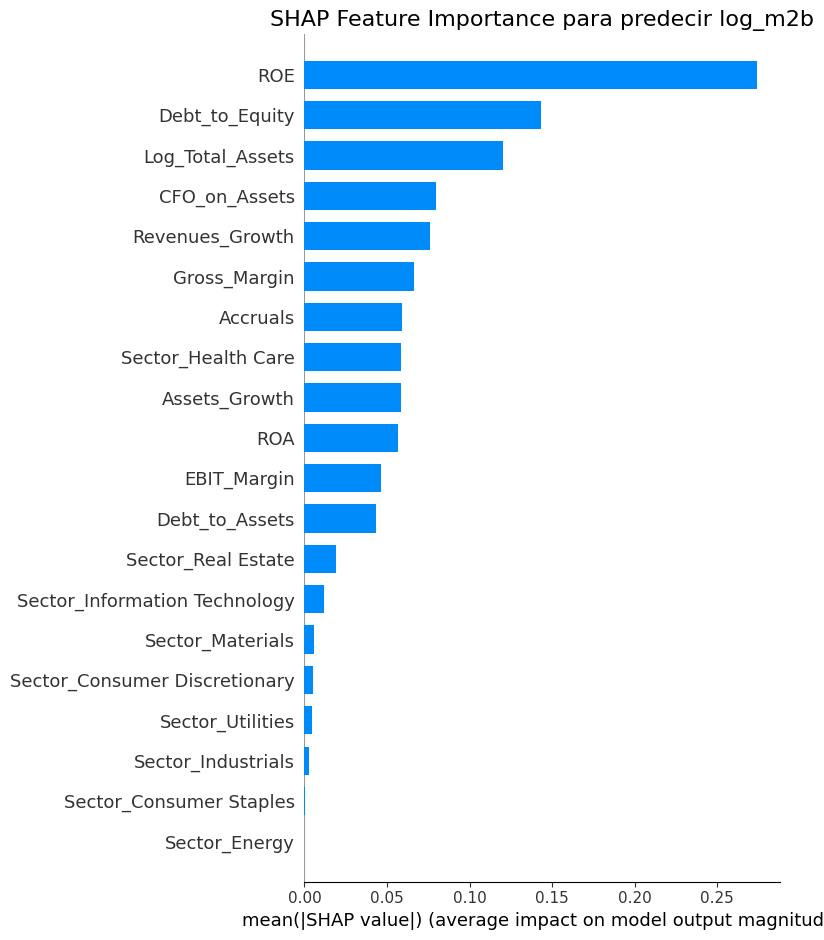


Generating SHAP summary plot for target: log_v2a (Model: LightGBM (Preciso))


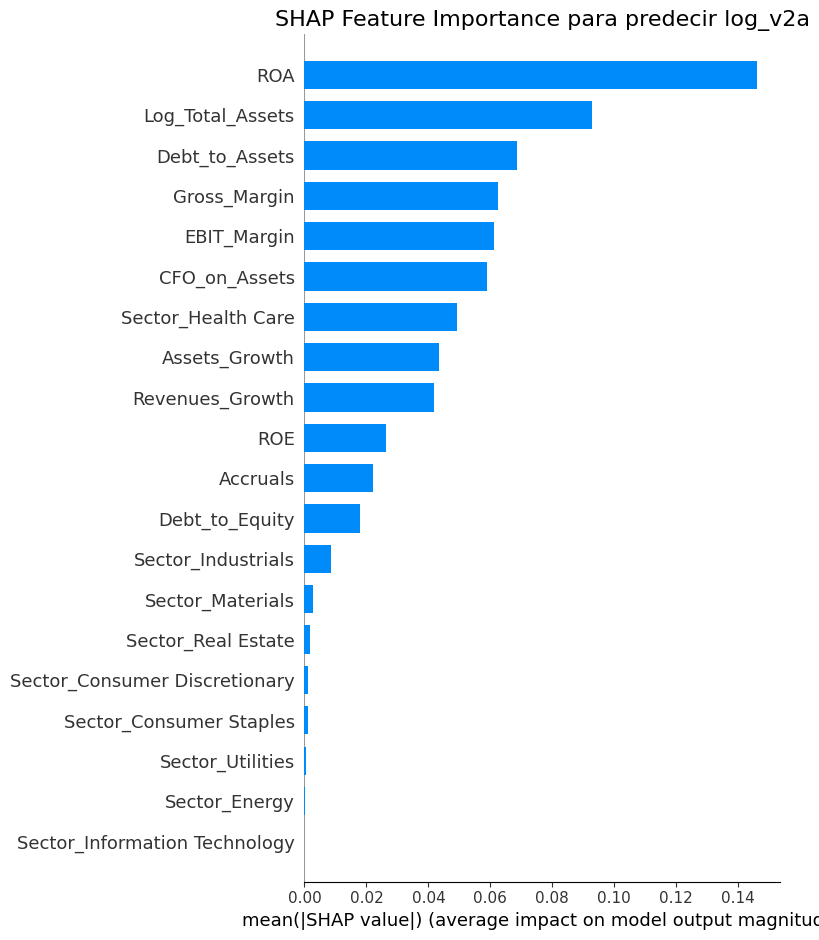


Generating SHAP summary plot for target: log_v2s (Model: LightGBM (Preciso))


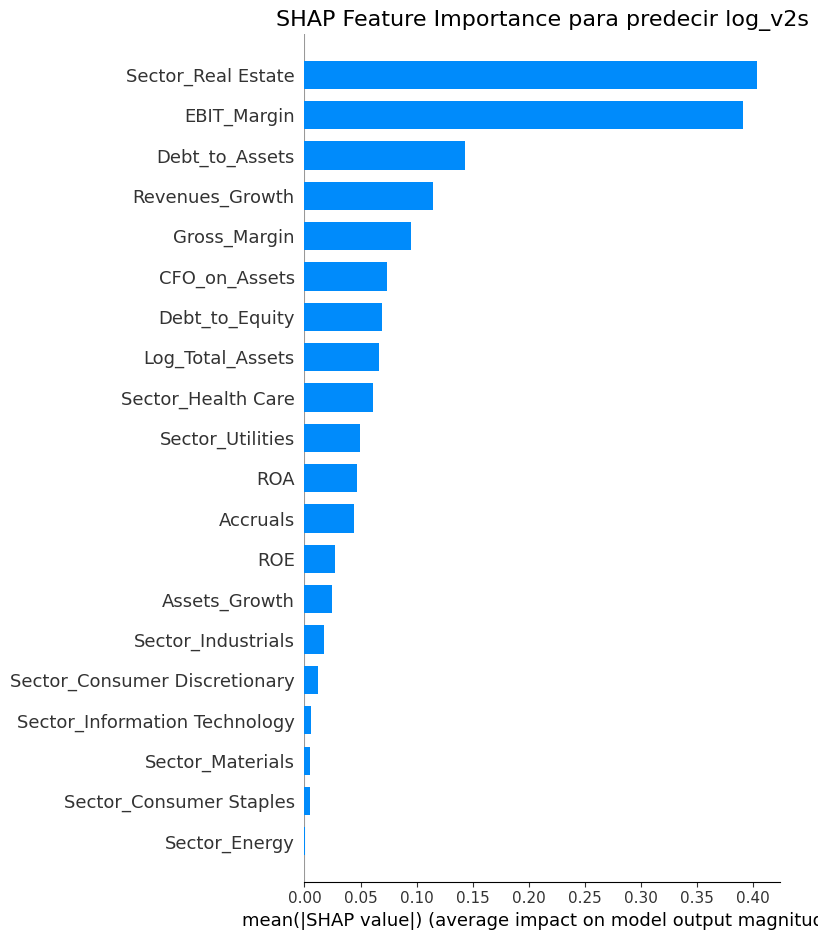

In [25]:
# SHAP sin Asset_turnover
# Creamos la visualización de los SHAP de Light GBM (Preciso)
if 'data_clean_wind' not in locals():
    print("Error: data_clean_wind DataFrame not found.")
    print("Please ensure the data cleaning and winsorization steps have been run.")
else:
    # Creamos la misma separación de datos de antes para los modelos para el SHAP
    datos = data_clean_wind.copy()

    datos = pd.get_dummies(datos, columns=['GICS Sector Name'], prefix='Sector', drop_first=True, dtype=int)
    train_years = range(8, 20)
    val_years = range(4, 8)
    test_years = range(0, 4)
    exclude_features = ['Company Name', 'Year', 'log_m2b', 'log_v2a', 'log_v2s','Asset_Turnover']
    all_possible_features = [col for col in datos.columns if col not in exclude_features]
    original_features = [col for col in data_clean_wind.columns if col not in exclude_features + ['GICS Sector Name']]
    dummy_features = [col for col in datos.columns if 'Sector_' in col]
    features_encoded = original_features + dummy_features

    # Solo necesitamos X_test para SHAP
    X_test = datos[datos['Year'].isin(test_years)][features_encoded].copy()

    # Transformamos bool a int para evitar problemas
    for col in X_test.select_dtypes(include='bool').columns:
        X_test[col] = X_test[col].astype(int)
    # --- Fin de la replicación de la preparación de datos ---


    # Buscamos el modelo
    model_name = 'LightGBM (Preciso)'
    target_variables = ['log_m2b', 'log_v2a', 'log_v2s']

    if 'trained_models' not in locals() or model_name not in trained_models:
        print(f"Error: Trained models or model type '{model_name}' not found in trained_models.")
        print("Please ensure the comprehensive training cell has been run.")
    else:
        # X_test_shap debe contener las mismas columnas en el mismo orden
        X_test_shap = X_test[features_encoded].copy()

        for target in target_variables:
            if target in trained_models[model_name]:
                model = trained_models[model_name][target]

                print(f"\nGenerating SHAP summary plot for target: {target} (Model: {model_name})")

                # Creamos SHAP explainer
                explainer = shap.TreeExplainer(model)

                # Calculamos los valores SHAP
                shap_values = explainer.shap_values(X_test_shap)

                # Generamos el bar plot de los SHAP values
                shap.summary_plot(shap_values, X_test_shap, plot_type="bar", show=False)
                plt.title(f'SHAP Feature Importance para predecir {target}', fontsize=16)
                plt.tight_layout()
                plt.show()

            else:
                print(f"Warning: Model {model_name} for target '{target}' not found in trained_models. Skipping SHAP plot.")

#Códigos Opcionales
## Modelos separados por celdas

In [17]:
import pandas as pd

# Create a copy of data_clean_wind
datos = data_clean_wind.copy()

# Lista de categorías originales de la variable
categorias = datos['GICS Sector Name'].unique()

# La categoría que se elimina es la primera en orden alfabético
categoria_ref = sorted(categorias)[0]

# Transform 'GICS Sector Name' into dummy variables
datos = pd.get_dummies(datos, columns=['GICS Sector Name'], prefix='Sector',drop_first=True, dtype= int)

print(f"Categoría de referencia (eliminada con drop_first=True): {categoria_ref}")

# Define the year ranges for splitting
train_years = range(8, 20)  # Years 8 to 19 (inclusive)
val_years = range(4, 8)     # Years 4 to 7 (inclusive)
test_years = range(0, 4)    # Years 0 to 3 (inclusive)
train_val_years = range(4, 20) # Para OLS

# Split the data based on the defined year ranges
train_data = datos[datos['Year'].isin(train_years)]
val_data = datos[datos['Year'].isin(val_years)]
train_val_data = datos[datos['Year'].isin(train_val_years)]
test_data = datos[datos['Year'].isin(test_years)]

print("DataFrame 'datos' created with dummy variables for GICS Sector Name.")
print(f"\nTraining data shape: {train_data.shape}")
print(f"Validation data shape: {val_data.shape}")
print(f"Test data shape: {test_data.shape}")

print(f"\nTraining/Validation data shape: {train_val_data.shape}")

Categoría de referencia (eliminada con drop_first=True): Communication Services
DataFrame 'datos' created with dummy variables for GICS Sector Name.

Training data shape: (924, 26)
Validation data shape: (522, 26)
Test data shape: (489, 26)

Training/Validation data shape: (1446, 26)


In [18]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Define the target variable
targets = ['log_m2b', 'log_v2a', 'log_v2s']

# Define the features to exclude
exclude_features = ['Company Name', 'Year', 'log_m2b', 'log_v2a', 'log_v2s']

# Define the features for the model (all columns in train_val_data except the excluded ones)
features = [col for col in train_val_data.columns if col not in exclude_features]
ols_results = []

# Iterate over the target variables
for target in targets:
  # Separate features (X) and target (y) for the training/validation combined data
  X_train_val = train_val_data[features]
  y_train_val = train_val_data[target]

  # Separate features (X) and target (y) for the test data
  X_test = test_data[features]
  y_test = test_data[target]

  # Add a constant to the features for the OLS model
  X_train_val = sm.add_constant(X_train_val)
  X_test = sm.add_constant(X_test)

  # Initialize and train the OLS model
  ols_model = sm.OLS(y_train_val, X_train_val).fit()

  print("OLS model trained successfully.")
  print(ols_model.summary())
  print(f"Categoría de referencia: {categoria_ref}")

  # Evaluate the model on the test set
  y_pred_ols = ols_model.predict(X_test)

  rmse_test_ols = np.sqrt(mean_squared_error(y_test, y_pred_ols))
  mae_test_ols = mean_absolute_error(y_test, y_pred_ols)
  r2_test_ols = r2_score(y_test, y_pred_ols)

  print(f"\nOLS Model evaluation on the test set (test_data):")
  print(f"  RMSE: {rmse_test_ols:.4f}")
  print(f"  MAE: {mae_test_ols:.4f}")
  print(f"  R2 Score: {r2_test_ols:.4f}")

  # Evaluate the model on the training/validation set
  y_pred_train_val_ols = ols_model.predict(X_train_val)

  rmse_train_val_ols = np.sqrt(mean_squared_error(y_train_val, y_pred_train_val_ols))
  mae_train_val_ols = mean_absolute_error(y_train_val, y_pred_train_val_ols)
  r2_train_val_ols = r2_score(y_train_val, y_pred_train_val_ols)


  print(f"\nOLS Model evaluation on the training/validation set (train_val_data):")
  print(f"  RMSE: {rmse_train_val_ols:.4f}")
  print(f"  MAE: {mae_train_val_ols:.4f}")
  print(f"  R2 Score: {r2_train_val_ols:.4f}")

  # Store the results
  ols_results.append({
        'Target': target,
        'Model': 'OLS',
        'Set': 'Test',
        'RMSE': rmse_test_ols,
        'MAE': mae_test_ols,
        'R2 Score': r2_test_ols
  })
  ols_results.append({
        'Target': target,
        'Model': 'OLS',
        'Set': 'Train/Val',
        'RMSE': rmse_train_val_ols,
        'MAE': mae_train_val_ols,
        'R2 Score': r2_train_val_ols
  })

# Display the collected results in a table
ols_results_df = pd.DataFrame(ols_results)
print("\nOLS Model Results:")
print(ols_results_df)

OLS model trained successfully.
                            OLS Regression Results                            
Dep. Variable:                log_m2b   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     46.15
Date:                Tue, 09 Sep 2025   Prob (F-statistic):          6.62e-144
Time:                        21:33:41   Log-Likelihood:                -1547.6
No. Observations:                1446   AIC:                             3139.
Df Residuals:                    1424   BIC:                             3255.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

In [19]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Define the target variables
targets = ['log_m2b', 'log_v2a', 'log_v2s']

# Define the features to exclude (same as OLS)
exclude_features = ['Company Name', 'Year', 'log_m2b', 'log_v2a', 'log_v2s']

# Define the features for the model (all columns in train_data except the excluded ones)
features = [col for col in train_data.columns if col not in exclude_features]

# List to store the evaluation metrics for each model
lgbm_results = []

for target in targets:
    print(f"\nTraining and evaluating LightGBM model for target: {target}")

    # Separate features (X) and target (y) for training, validation, and test data
    X_train = train_data[features].copy()
    y_train = train_data[target]

    X_val = val_data[features].copy()
    y_val = val_data[target]

    X_test = test_data[features].copy()
    y_test = test_data[target]


    # Create LightGBM datasets
    lgb_train = lgb.Dataset(X_train, label=y_train)
    lgb_val = lgb.Dataset(X_val, label=y_val, reference=lgb_train)

    # Define LightGBM parameters (example parameters, can be tuned)
    params = {
        'objective': 'regression_l1',  # MAE objective, often good for financial data
        'metric': ['mae', 'rmse', 'r2'],           # Metrics to monitor during training
        'n_estimators': 3000,       # Large number of boosting rounds with early stopping
        'learning_rate': 0.01,      # Step size shrinkage
        'feature_fraction': 0.8,    # Fraction of features to consider per iteration
        'bagging_fraction': 0.8,    # Fraction of data to sample per iteration
        'bagging_freq': 1,          # Frequency for bagging
        'lambda_l1': 0.1,              # Regularization L1
        'lambda_l2': 0.1,              # Regularization L2
        'num_leaves': 31,              # Maximum number of leaves per tree
        'verbose': -1,              # Suppress verbose output
        'n_jobs': -1,               # Use all available CPU cores
        'seed': 42                  # Random seed for reproducibility
    }

    # Train the LightGBM model with early stopping
    model = lgb.train(params,
                      lgb_train,
                      num_boost_round=10000, # Max boosting rounds
                      valid_sets=[lgb_train, lgb_val],
                      callbacks=[lgb.early_stopping(stopping_rounds=50, verbose=False)]) # Early stopping


    print("LightGBM model trained successfully.")

    # Evaluate the model on the test set
    y_pred_test = model.predict(X_test, num_iteration=model.best_iteration)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    mae_test = mean_absolute_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)


    print(f"\nLightGBM Model evaluation on the test set (test_data):")
    print(f"  RMSE: {rmse_test:.4f}")
    print(f"  MAE: {mae_test:.4f}")
    print(f"  R2 Score: {r2_test:.4f}")

    # Evaluate the model on the training set
    y_pred_train = model.predict(X_train, num_iteration=model.best_iteration)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    mae_train = mean_absolute_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)


    print(f"\nLightGBM Model evaluation on the training set (train_data):")
    print(f"  RMSE: {rmse_train:.4f}")
    print(f"  MAE: {mae_train:.4f}")
    r2_train = r2_score(y_train, y_pred_train)


    # Store the results
    lgbm_results.append({
        'Target': target,
        'Model': 'LightGBM',
        'Set': 'Test',
        'RMSE': rmse_test,
        'MAE': mae_test,
        'R2 Score': r2_test
    })
    lgbm_results.append({
        'Target': target,
        'Model': 'LightGBM',
        'Set': 'Train',
        'RMSE': rmse_train,
        'MAE': mae_train,
        'R2 Score': r2_train
    })

# Display the collected results in a table
lgbm_results_df = pd.DataFrame(lgbm_results)
print("\nSummary of LightGBM Model Results:")
display(lgbm_results_df)


Training and evaluating LightGBM model for target: log_m2b


KeyboardInterrupt: 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Define the target variables
targets = ['log_m2b', 'log_v2a', 'log_v2s']

# Define the features to exclude (same as OLS and LightGBM)
exclude_features = ['Company Name', 'Year', 'log_m2b', 'log_v2a', 'log_v2s']

# Define the features for the model (all columns in train_data except the excluded ones)
features = [col for col in train_data.columns if col not in exclude_features]

# List to store the evaluation metrics for each model
rf_results = []

for target in targets:
    print(f"\nTraining and evaluating Random Forest model for target: {target}")

    # Separate features (X) and target (y) for training and test data
    # Random Forest in sklearn does not directly use validation set during training like LightGBM with early stopping
    X_train = train_data[features].copy()
    y_train = train_data[target]

    X_test = test_data[features].copy()
    y_test = test_data[target]

    # Convert boolean columns to numeric (int) for compatibility
    for col in X_train.select_dtypes(include='bool').columns:
        X_train[col] = X_train[col].astype(int)
    for col in X_test.select_dtypes(include='bool').columns:
        X_test[col] = X_test[col].astype(int)


    # Initialize and train the Random Forest Regressor model
    # Using example parameters; these can be tuned
    rf_model = RandomForestRegressor(n_estimators=300, # Number of trees in the forest
                                     max_depth=10,   # Maximum depth of the trees
                                     random_state=42, # Random seed for reproducibility
                                     n_jobs=-1)      # Use all available CPU cores


    rf_model.fit(X_train, y_train)

    print("Random Forest model trained successfully.")

    # Evaluate the model on the test set
    y_pred_test = rf_model.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    mae_test = mean_absolute_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)


    print(f"\nRandom Forest Model evaluation on the test set (test_data):")
    print(f"  RMSE: {rmse_test:.4f}")
    print(f"  MAE: {mae_test:.4f}")
    print(f"  R2 Score: {r2_test:.4f}")

    # Evaluate the model on the training set
    y_pred_train = rf_model.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    mae_train = mean_absolute_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)


    print(f"\nRandom Forest Model evaluation on the training set (train_data):")
    print(f"  RMSE: {rmse_train:.4f}")
    print(f"  MAE: {mae_train:.4f}")
    r2_train = r2_score(y_train, y_pred_train)


    # Store the results
    rf_results.append({
        'Target': target,
        'Model': 'Random Forest',
        'Set': 'Test',
        'RMSE': rmse_test,
        'MAE': mae_test,
        'R2 Score': r2_test
    })
    rf_results.append({
        'Target': target,
        'Model': 'Random Forest',
        'Set': 'Train',
        'RMSE': rmse_train,
        'MAE': mae_train,
        'R2 Score': r2_train
    })

# Display the collected results in a table
rf_results_df = pd.DataFrame(rf_results)
print("\nSummary of Random Forest Model Results:")
display(rf_results_df)

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Define the target variables
targets = ['log_m2b', 'log_v2a', 'log_v2s']

# Define the features to exclude (same as previous models)
exclude_features = ['Company Name', 'Year', 'log_m2b', 'log_v2a', 'log_v2s']

# Define the features for the model (all columns in train_data except the excluded ones)
features = [col for col in train_data.columns if col not in exclude_features]

# List to store the evaluation metrics for each model
svr_results = []

for target in targets:
    print(f"\nTraining and evaluating Support Vector Regression model for target: {target}")

    # Separate features (X) and target (y) for training and test data
    X_train = train_data[features].copy()
    y_train = train_data[target]

    X_test = test_data[features].copy()
    y_test = test_data[target]

    # Convert boolean columns to numeric (int) for compatibility
    for col in X_train.select_dtypes(include='bool').columns:
        X_train[col] = X_train[col].astype(int)
    for col in X_test.select_dtypes(include='bool').columns:
        X_test[col] = X_test[col].astype(int)

    # Scale the features (SVR is sensitive to feature scaling)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)


    # Initialize and train the Support Vector Regression model
    # Using example parameters; these can be tuned
    svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1) # RBF kernel is common for non-linear relationships


    svr_model.fit(X_train_scaled, y_train)

    print("Support Vector Regression model trained successfully.")

    # Evaluate the model on the test set
    y_pred_test = svr_model.predict(X_test_scaled)

    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    mae_test = mean_absolute_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)


    print(f"\nSupport Vector Regression Model evaluation on the test set (test_data):")
    print(f"  RMSE: {rmse_test:.4f}")
    print(f"  MAE: {mae_test:.4f}")
    print(f"  R2 Score: {r2_test:.4f}")

    # Evaluate the model on the training set
    y_pred_train = svr_model.predict(X_train_scaled)

    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    mae_train = mean_absolute_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)


    print(f"\nSupport Vector Regression Model evaluation on the training set (train_data):")
    print(f"  RMSE: {rmse_train:.4f}")
    print(f"  MAE: {mae_train:.4f}")
    r2_train = r2_score(y_train, y_pred_train)


    # Store the results
    svr_results.append({
        'Target': target,
        'Model': 'SVR',
        'Set': 'Test',
        'RMSE': rmse_test,
        'MAE': mae_test,
        'R2 Score': r2_test
    })
    svr_results.append({
        'Target': target,
        'Model': 'SVR',
        'Set': 'Train',
        'RMSE': rmse_train,
        'MAE': mae_train,
        'R2 Score': r2_train
    })

# Display the collected results in a table
svr_results_df = pd.DataFrame(svr_results)
print("\nSummary of Support Vector Regression Model Results:")
display(svr_results_df)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Define the target variables
targets = ['log_m2b', 'log_v2a', 'log_v2s']

# Define the features to exclude (same as previous models)
exclude_features = ['Company Name', 'Year', 'log_m2b', 'log_v2a', 'log_v2s']

# Define the features for the model (all columns in train_data except the excluded ones)
features = [col for col in train_data.columns if col not in exclude_features]

# List to store the evaluation metrics for each model
nn_results = []

for target in targets:
    print(f"\nTraining and evaluating MLP Neural Network model for target: {target}")

    # Separate features (X) and target (y) for training, validation, and test data
    X_train = train_data[features].copy()
    y_train = train_data[target]

    X_val = val_data[features].copy()
    y_val = val_data[target]

    X_test = test_data[features].copy()
    y_test = test_data[target]

    # Convert boolean columns to numeric (int) for compatibility
    for col in X_train.select_dtypes(include='bool').columns:
        X_train[col] = X_train[col].astype(int)
    for col in X_val.select_dtypes(include='bool').columns:
        X_val[col] = X_val[col].astype(int)
    for col in X_test.select_dtypes(include='bool').columns:
        X_test[col] = X_test[col].astype(int)

    # Scale the features (Neural Networks are sensitive to feature scaling)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)


    # Define the MLP Neural Network model
    model_nn = Sequential([
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1) # Output layer for regression
    ])

    # Compile the model
    model_nn.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse', 'RootMeanSquaredError'])

    print("MLP Neural Network model compiled.")

    # Train the model with validation data and early stopping
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

    history = model_nn.fit(X_train_scaled, y_train,
                           validation_data=(X_val_scaled, y_val),
                           epochs=1000, # Set a sufficiently large number of epochs
                           callbacks=[early_stopping],
                           verbose=0) # Set verbose to 0 to suppress epoch output


    print("MLP Neural Network model trained successfully.")

    # Evaluate the model on the test set
    loss_test, mae_test, mse_test, rmse_test = model_nn.evaluate(X_test_scaled, y_test, verbose=0)

    print(f"\nMLP Neural Network Model evaluation on the test set (test_data):")
    print(f"  RMSE: {rmse_test:.4f}")
    print(f"  MAE: {mae_test:.4f}")
    r2_test = r2_score(y_test, model_nn.predict(X_test_scaled, verbose=0))
    print(f"  R2 Score: {r2_test:.4f}")


    # Evaluate the model on the training set
    loss_train, mae_train, mse_train, rmse_train = model_nn.evaluate(X_train_scaled, y_train, verbose=0)

    print(f"\nMLP Neural Network Model evaluation on the training set (train_data):")
    print(f"  RMSE: {rmse_train:.4f}")
    print(f"  MAE: {mae_train:.4f}")
    r2_train = r2_score(y_train, model_nn.predict(X_train_scaled, verbose=0))
    print(f"  R2 Score: {r2_train:.4f}")


    # Store the results
    nn_results.append({
        'Target': target,
        'Model': 'MLP Neural Network',
        'Set': 'Test',
        'RMSE': rmse_test,
        'MAE': mae_test,
        'R2 Score': r2_test
    })
    nn_results.append({
        'Target': target,
        'Model': 'MLP Neural Network',
        'Set': 'Train',
        'RMSE': rmse_train,
        'MAE': mae_train,
        'R2 Score': r2_train
    })

# Display the collected results in a table
nn_results_df = pd.DataFrame(nn_results)
print("\nSummary of MLP Neural Network Model Results:")
display(nn_results_df)

In [ ]:
import pandas as pd

# Combine results from all models
all_results = pd.concat([ols_results_df, lgbm_results_df, rf_results_df, svr_results_df, nn_results_df], ignore_index=True)

# Separate results for training and test sets
train_results = all_results[all_results['Set'].str.contains('Train')].copy()
test_results = all_results[all_results['Set'] == 'Test'].copy()

# Drop the 'Set' column as it's no longer needed in the separate tables
train_results = train_results.drop(columns='Set')
test_results = test_results.drop(columns='Set')

# Function to highlight the best value in each column
def highlight_best(s):
    # Apply highlighting only to numeric columns
    if s.name in ['RMSE', 'MAE']:
        is_best = s == s.min()
        return ['background-color: green' if v else '' for v in is_best]
    elif s.name == 'R2 Score':
        is_best = s == s.max()
        return ['background-color: green' if v else '' for v in is_best]
    else:
        # Return empty styles for non-numeric columns
        return ['' for _ in s]


# Display training results table with highlighting
print("Comparison of Model Performance on Training Data:")

# Alternative display: grouped by target
for target in train_results['Target'].unique():
    print(f"\n--- Training Results for {target} ---")
    target_train_results = train_results[train_results['Target'] == target].drop(columns='Target')
    display(target_train_results.style.apply(highlight_best, axis=0)) # Highlight column-wise


# Display test results table with highlighting
print("\nComparison of Model Performance on Test Data:")

# Alternative display: grouped by target
for target in test_results['Target'].unique():
    print(f"\n--- Test Results for {target} ---")
    target_test_results = test_results[test_results['Target'] == target].drop(columns='Target')
    display(target_test_results.style.apply(highlight_best, axis=0)) # Highlight column-wise